In [1]:
import random
import scienceplots
import os
from collections import Counter
import functools
from importlib import reload
import pickle
import copy
import re
import warnings
import utils
reload(utils)
import utils_selection
reload(utils_selection)

import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LassoCV, LassoLarsCV, Lasso
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning


/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Ancestry

Parameters for experiments

In [2]:
data_name = 'ancestry_all_aims_rsID'

# Lasso-based feature selection and ML evaluation
seeds = [0, 1, 2,3,4]
shots = [10,20,40,80,160,320,640] 

file = 'ancestry_maybe_snps.pkl'
with open('ancestry_maybe_snps.pkl', 'rb') as file:
    maybe_snps = pickle.load(file)

In [3]:
# PCA
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_pca, rf_results_pca, _ = utils_selection.evaluate_feature_selection(data_name, "pca", seeds, shots, return_stored_results=True)
    utils_selection.print_results("pca", "ancestry", log_reg_results_pca, rf_results_pca, shots)

../data/selected_features/feature_selection_ancestry_all_aims_rsID_pca_[10, 20, 40, 80, 160, 320, 640]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pca feature selection on k-shot classification for: ancestry

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  10  | Logistic Regression |    0.4623    | 0.04 | 0.7304  | 0.02 |    0.3631    | 0.09 |
|  10  |    Random Forest    |    0.3906    | 0.06 | 0.7148  | 0.02 |    0.3025    | 0.10 |
|  20  | Logistic Regression |    0.5099    | 0.04 | 0.7553  | 0.03 |    0.5064    | 0.03 |
|  20  |    Random Forest    |    0.4984    | 0.03 | 0.7517  | 0.04 |    0.4934    | 0.03 |
|  40  | Logistic Regress

In [86]:
# PCA_m
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_pca_m, rf_results_pca_m, _ = utils_selection.evaluate_feature_selection(data_name, "pca_m", seeds, shots, return_stored_results=True)
    utils_selection.print_results("pca", "ancestry", log_reg_results_pca_m, rf_results_pca_m, shots)

../data/selected_features/feature_selection_ancestry_all_aims_rsID_pca_m_[10, 20, 40, 80, 160, 320, 640]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pca feature selection on k-shot classification for: ancestry

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  10  | Logistic Regression |    0.6906    | 0.04 | 0.8726  | 0.02 |    0.6641    | 0.04 |
|  10  |    Random Forest    |    0.6058    | 0.17 | 0.7997  | 0.15 |    0.5674    | 0.23 |
|  20  | Logistic Regression |    0.7653    | 0.04 | 0.9133  | 0.03 |    0.7463    | 0.05 |
|  20  |    Random Forest    |    0.7452    | 0.07 | 0.9003  | 0.03 |    0.7261    | 0.06 |
|  40  | Logistic Regre

In [4]:
# Lasso
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_lasso, rf_results_lasso,_ = utils_selection.evaluate_feature_selection(data_name, "lasso", seeds, shots, return_stored_results=True)
    utils_selection.print_results("lasso", "ancestry", log_reg_results_lasso, rf_results_lasso, shots)

../data/selected_features/feature_selection_ancestry_all_aims_rsID_lasso_[10, 20, 40, 80, 160, 320, 640]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot lasso feature selection on k-shot classification for: ancestry

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  10  | Logistic Regression |    0.5040    | 0.05 | 0.7778  | 0.03 |    0.4961    | 0.06 |
|  10  |    Random Forest    |    0.4430    | 0.03 | 0.7339  | 0.03 |    0.4344    | 0.04 |
|  20  | Logistic Regression |    0.5452    | 0.03 | 0.8135  | 0.01 |    0.5446    | 0.02 |
|  20  |    Random Forest    |    0.5198    | 0.03 | 0.8058  | 0.01 |    0.5086    | 0.01 |
|  40  | Logistic Reg

In [88]:
# Weighted Sum PCA
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_pca_weighted_sum, rf_results_pca_weighted_sum,_ = utils_selection.evaluate_feature_selection(data_name, "pca_weighted_sum", seeds, shots, return_stored_results=True)
    utils_selection.print_results("pca_weighted_sum", "ancestry", log_reg_results_pca_weighted_sum, rf_results_pca_weighted_sum, shots)

../data/selected_features/feature_selection_ancestry_all_aims_rsID_pca_weighted_sum_[10, 20, 40, 80, 160, 320, 640]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pca_weighted_sum feature selection on k-shot classification for: ancestry

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  10  | Logistic Regression |    0.3141    | 0.07 | 0.6384  | 0.06 |    0.3133    | 0.08 |
|  10  |    Random Forest    |    0.2887    | 0.05 | 0.6201  | 0.03 |    0.2831    | 0.06 |
|  20  | Logistic Regression |    0.4569    | 0.05 | 0.7542  | 0.02 |    0.4653    | 0.04 |
|  20  |    Random Forest    |    0.4284    | 0.07 | 0.7257  | 0.02 |    0.4229    | 0.06 |

In [5]:
# gini
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_gini, rf_results_gini,_ = utils_selection.evaluate_feature_selection(data_name, "gini",  seeds, shots, return_stored_results=True, model="rf",)
    utils_selection.print_results("gini", "ancestry", log_reg_results_gini, rf_results_gini, shots)

../data/selected_features/feature_selection_ancestry_all_aims_rsID_gini_[10, 20, 40, 80, 160, 320, 640]_[0, 1, 2, 3, 4]_15_rf.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot gini feature selection on k-shot classification for: ancestry

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  10  | Logistic Regression |    0.4995    | 0.07 | 0.7802  | 0.05 |    0.5076    | 0.06 |
|  10  |    Random Forest    |    0.4482    | 0.07 | 0.7365  | 0.06 |    0.4542    | 0.06 |
|  20  | Logistic Regression |    0.6636    | 0.05 | 0.8683  | 0.03 |    0.6542    | 0.05 |
|  20  |    Random Forest    |    0.6182    | 0.04 | 0.8477  | 0.02 |    0.6140    | 0.04 |
|  40  | Logistic Re

In [150]:
# backwards
shots = [10,20,40,80,160,320]
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_backward, rf_results_backward,_ = utils_selection.evaluate_feature_selection(data_name, "data_pipeline_backward",  seeds, shots, return_stored_results=True, model="rf",)
    utils_selection.print_results("backward", "ancestry", log_reg_results_backward, rf_results_backward, shots)

../data/selected_features/feature_selection_ancestry_all_aims_rsID_data_pipeline_backward_[10, 20, 40, 80, 160, 320]_[0, 1, 2, 3, 4]_15_rf.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot backward feature selection on k-shot classification for: ancestry

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  10  | Logistic Regression |    0.5681    | 0.10 | 0.8053  | 0.06 |    0.5609    | 0.10 |
|  10  |    Random Forest    |    0.5168    | 0.09 | 0.7693  | 0.06 |    0.5058    | 0.09 |
|  20  | Logistic Regression |    0.6280    | 0.04 | 0.8494  | 0.01 |    0.6262    | 0.03 |
|  20  |    Random Forest    |    0.5642    | 0.04 | 0.8134  | 0.01 |    0.5707    | 0.03 |
|  

In [158]:
# forward
shots = [10,20,40,80,160,320]
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_forward, rf_results_forward, a= utils_selection.evaluate_feature_selection(data_name, "data_pipeline_forward",  seeds, shots, return_stored_results=True, model="rf",)
    utils_selection.print_results("forward", "ancestry", log_reg_results_forward, rf_results_forward, shots)

../data/selected_features/feature_selection_ancestry_all_aims_rsID_data_pipeline_forward_[10, 20, 40, 80, 160, 320]_[0, 1, 2, 3, 4]_15_rf.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot forward feature selection on k-shot classification for: ancestry

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  10  | Logistic Regression |    0.5569    | 0.04 | 0.8089  | 0.02 |    0.5500    | 0.03 |
|  10  |    Random Forest    |    0.4869    | 0.05 | 0.7712  | 0.03 |    0.4735    | 0.04 |
|  20  | Logistic Regression |    0.6602    | 0.04 | 0.8681  | 0.02 |    0.6543    | 0.04 |
|  20  |    Random Forest    |    0.6222    | 0.04 | 0.8448  | 0.02 |    0.6235    | 0.04 |
|  40

In [6]:
# Pyramid
reload(utils)
reload(utils_selection)
log_reg_results_pyramid, rf_results_pyramid, a  = utils_selection.evaluate_feature_selection(data_name, "pyramid", seeds, shots, feature_selection_pool=maybe_snps, return_stored_results=True, use_grid_search=False,load_specific_pkl = '2024-09-13 05:01:02')
utils_selection.print_results("pyramid", "ancestry", log_reg_results_pyramid, rf_results_pyramid, shots)

../data/selected_features/feature_selection_ancestry_all_aims_rsID_pyramid_[10, 20, 40, 80, 160, 320, 640]_[0, 1, 2, 3, 4]_152024-09-13 05:01:02.pkl
Found existing file with seeds: [0, 1, 2, 3, 4]. Loading partial results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pyramid feature selection on k-shot classification for: ancestry

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  10  | Logistic Regression |    0.7714    | 0.05 | 0.9204  | 0.03 |    0.7504    | 0.04 |
|  10  |    Random Forest    |    0.7569    | 0.04 | 0.9090  | 0.02 |    0.7414    | 0.04 |
|  20  | Logistic Regression |    0.8222    | 0.03 | 0.9427  | 0.01 |    0.8134    | 0.02 |
|  20  |    Random Forest    |    0.82

In [31]:
# Pyramid
reload(utils)
reload(utils_selection)
log_reg_results_pyramid, rf_results_pyramid, a  = utils_selection.evaluate_feature_selection(data_name, "pyramid", seeds, shots, feature_selection_pool=maybe_snps, return_stored_results=True, use_grid_search=True, load_specific_pkl='2024-09-13 05:34:50')
utils_selection.print_results("pyramid", "ancestry", log_reg_results_pyramid, rf_results_pyramid, shots)

Found existing file with seeds: [0, 1, 2, 3, 4]. Loading results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pyramid feature selection on k-shot classification for: ancestry

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  10  | Logistic Regression |    0.7714    | 0.05 | 0.9204  | 0.03 |    0.7504    | 0.04 |
|  10  |    Random Forest    |    0.7569    | 0.04 | 0.9090  | 0.02 |    0.7414    | 0.04 |
|  20  | Logistic Regression |    0.8222    | 0.03 | 0.9427  | 0.01 |    0.8134    | 0.02 |
|  20  |    Random Forest    |    0.8248    | 0.02 | 0.9430  | 0.02 |    0.8091    | 0.02 |
|  40  | Logistic Regression |    0.8529    | 0.02 | 0.9614  | 0.01 |    0.8466    | 0.02 |
|  40  |   

In [36]:
# with open('../data/selected_features/feature_selection_ancestry_all_aims_rsID_pyramid_[10, 20, 40, 80, 160, 320, 640]_[0, 1, 2, 3]_15.pkl', 'rb') as file:
#     temp_data = pickle.load(file)
# temp_data['feature_selections'][4] = ['rs12913832', 'rs4988235', 'rs671', 'rs2814778', 'rs1426654', 'rs16891982', 'rs3827760', 'rs2047001', 'rs10492947', 'rs174570', 'rs4420638', 'rs1407514', 'rs10493096', 'rs2046071', 'rs3910044']
# # Save the `data` back into a .pkl file
# with open('../data/selected_features/feature_selection_ancestry_all_aims_rsID_pyramid_[10, 20, 40, 80, 160, 320, 640]_[0, 1, 2, 3,4]_15.pkl', 'wb') as file:
#     pickle.dump(temp_data, file)

In [7]:
# Iterative
reload(utils_selection)
log_reg_results_iterative, rf_results_iterative, b = utils_selection.evaluate_feature_selection(data_name, "iterative_self_consistency", seeds, shots, feature_selection_pool=maybe_snps, return_stored_results=True)
utils_selection.print_results("pyramid", "iterative_self_consistency", log_reg_results_iterative, rf_results_iterative, shots)

../data/selected_features/feature_selection_ancestry_all_aims_rsID_iterative_self_consistency_[10, 20, 40, 80, 160, 320, 640]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pyramid feature selection on k-shot classification for: iterative_self_consistency

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  10  | Logistic Regression |    0.7565    | 0.05 | 0.9147  | 0.02 |    0.7491    | 0.04 |
|  10  |    Random Forest    |    0.7136    | 0.04 | 0.8966  | 0.02 |    0.7030    | 0.04 |
|  20  | Logistic Regression |    0.8014    | 0.04 | 0.9331  | 0.02 |    0.7880    | 0.04 |
|  20  |    Random Forest    |    0.7947    | 0.04 | 0.9315  | 0.01 |   

In [8]:
# LLM-select
log_reg_results_llm_select, rf_results_llm_select, a  = utils_selection.evaluate_feature_selection(data_name, "llm_select", seeds, shots, feature_selection_pool=maybe_snps, return_stored_results=True)
utils_selection.print_results("pyramid", "ancestry", log_reg_results_llm_select, rf_results_llm_select, shots)

../data/selected_features/feature_selection_ancestry_all_aims_rsID_llm_select_[10, 20, 40, 80, 160, 320, 640]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pyramid feature selection on k-shot classification for: ancestry

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  10  | Logistic Regression |    0.7511    | 0.06 | 0.9008  | 0.03 |    0.7379    | 0.05 |
|  10  |    Random Forest    |    0.7304    | 0.06 | 0.8869  | 0.01 |    0.7132    | 0.05 |
|  20  | Logistic Regression |    0.7891    | 0.03 | 0.9255  | 0.02 |    0.7820    | 0.03 |
|  20  |    Random Forest    |    0.7973    | 0.04 | 0.9341  | 0.02 |    0.7866    | 0.04 |
|  40  | Logis

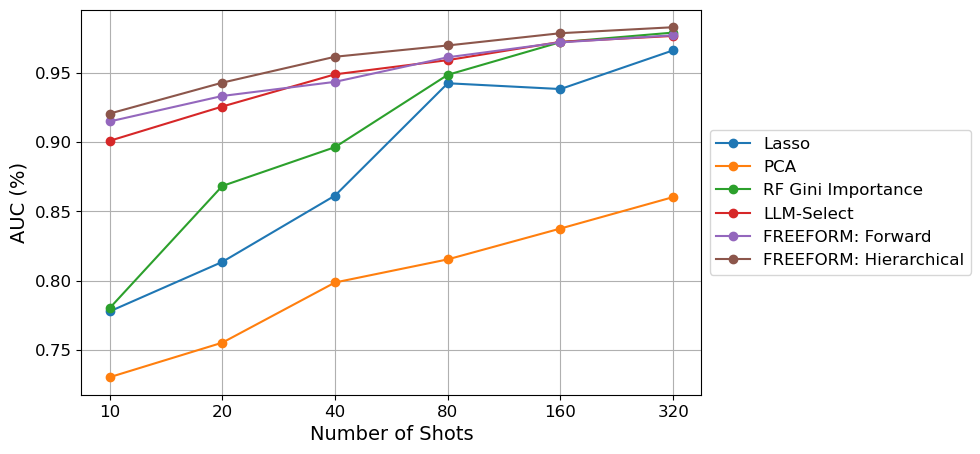

In [9]:
# Assuming you have results from multiple methods
# Assuming you have already computed the results for each method
results_dict = {
    'Lasso': log_reg_results_lasso,
    'PCA': log_reg_results_pca,
    'RF Gini Importance': log_reg_results_gini,
    #'Forward': log_reg_results_forward,
    'LLM-Select': log_reg_results_llm_select,
    'FREEFORM: Forward': log_reg_results_iterative,
    'FREEFORM: Hierarchical':  log_reg_results_pyramid,
}
shots = [10,20,40,80,160, 320] 

utils_selection.plot_results("Ancestry", "lr", results_dict, shots)

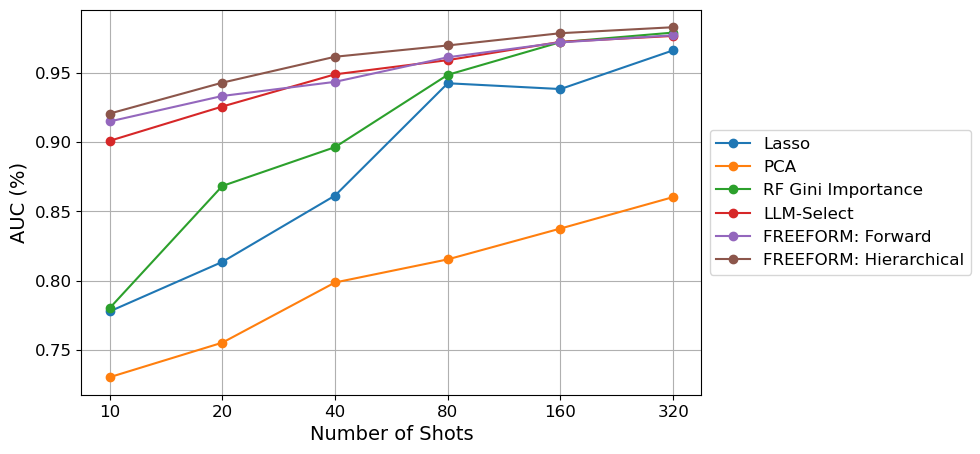

In [10]:
# Assuming you have results from multiple methods
# Assuming you have already computed the results for each method
results_dict_rf = {
    'Lasso': rf_results_lasso,
    'PCA': rf_results_pca,
    'RF Gini Importance': rf_results_gini,
    #'Forward': rf_results_forward,
    'LLM-Select': rf_results_llm_select,
    'FREEFORM: Forward': rf_results_iterative,
    'FREEFORM: Hierarchical':  rf_results_pyramid,
}
shots = [10,20,40,80,160, 320] 

utils_selection.plot_results("Ancestry", "rf", results_dict, shots)

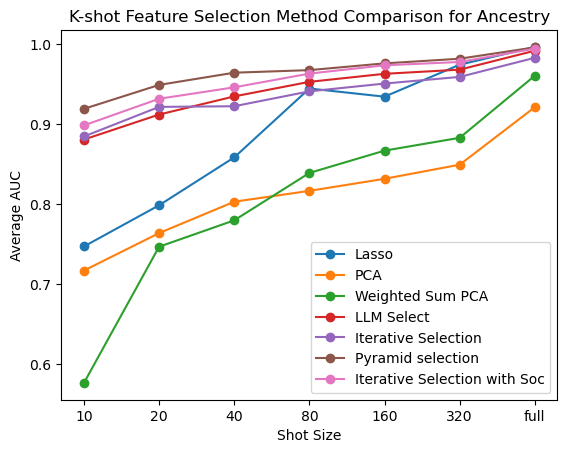

In [206]:
# Assuming you have results from multiple methods
# Assuming you have already computed the results for each method
results_dict_ = {
    'LASSO': rf_results_lasso,
    'PCA': rf_results_pca,
    'Weighted PCA': rf_results_pca_weighted_sum,
    'LLM-Select': llm_select_results['rf_results'],
    'Iterative Selection':  iterative_soc_results['rf_results'],
    'Heiarchical Selection':  pyramid_results['rf_results'],
}
plot_results("Ancestry", results_dict_rf, shots)

In [45]:
# paired t-test between LLM-select & Pyramid

p_value_log_reg, p_value_rf = compute_p_value_for_auc(
    pyramid_results['log_reg_results'],
    llm_select_results['log_reg_results'],
    pyramid_results['rf_results'],
    llm_select_results['rf_results'],
    shots
)

Logistic Regression AUC p-value: 0.00001494
Random Forest AUC p-value: 0.00000866


## Hearing Loss

In [32]:
data_name = 'hearing_loss_modified'


# Lasso-based feature selection and ML evaluation
seeds = [0, 1, 2,3,4]
shots = [4,8,16,32,64,128,256] 

file = 'hearing_loss_maybe_snps.pkl'
with open(file, 'rb') as file:
    maybe_snps = pickle.load(file)

In [54]:
df, X_train, X_test, y_train, y_test, target_attribute, label_list, _ = utils.get_dataset(data_name, 20, 0)


In [69]:
df[a[0]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1208
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   c.35delG         1208 non-null   int64
 1   A1555G           1208 non-null   int64
 2   c.235delC        1208 non-null   int64
 3   p.V37I           1208 non-null   int64
 4   c.919_2A>G       1208 non-null   int64
 5   p.R75W           1208 non-null   int64
 6   p.W77X           1208 non-null   int64
 7   p.R143W          1208 non-null   int64
 8   c.234_235delC    1208 non-null   int64
 9   c.299_300delAT   1208 non-null   int64
 10  c.918+2T>C       1208 non-null   int64
 11  p.R143Q          1208 non-null   int64
 12  p.R75Q           1208 non-null   int64
 13  c.443delC        1208 non-null   int64
 14  c.1339_1340delA  1208 non-null   int64
dtypes: int64(15)
memory usage: 183.3 KB


In [73]:
sum(df[a[0]]['p.R75W'])

0

<Axes: >

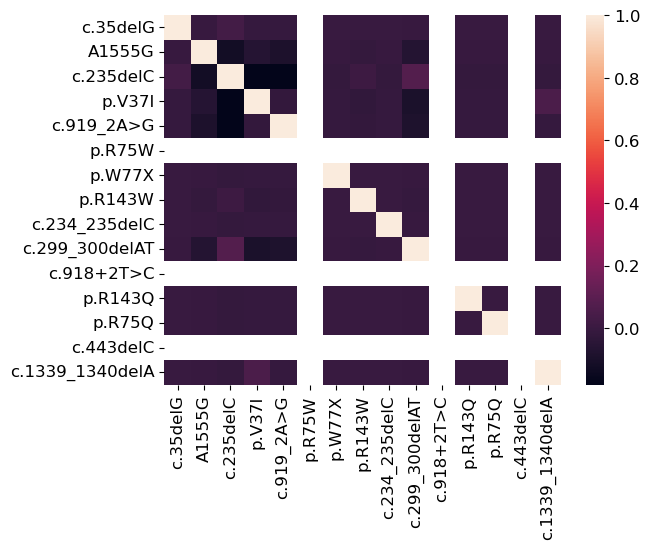

In [74]:
df[a[0]].corr()

import seaborn as sns
sns.heatmap(df[a[0]].corr())



<Axes: >

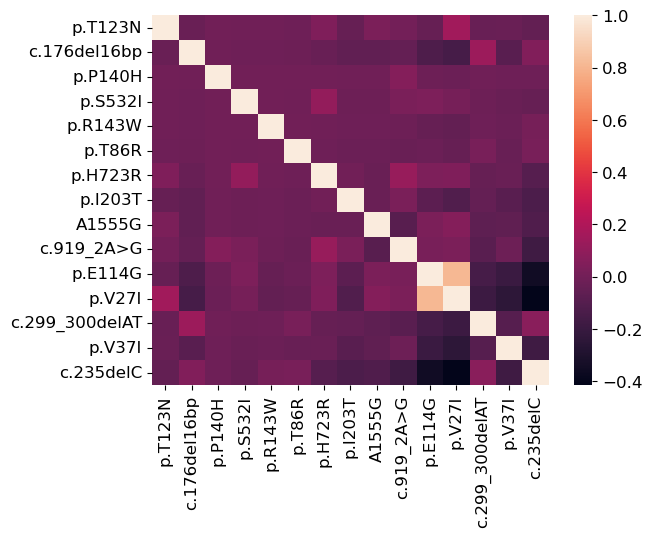

In [80]:
sns.heatmap(df[a1[128][0]].corr())

In [ ]:
df[a1[64][0]].corr()

In [33]:
# PCA
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_pca_hearing_loss, rf_results_pca_hearing_loss, _ = utils_selection.evaluate_feature_selection(data_name, "pca", seeds, shots, return_stored_results=True)
    utils_selection.print_results("pca", "hearing_loss", log_reg_results_pca_hearing_loss, rf_results_pca_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_pca_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pca feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.4344    | 0.10 | 0.5001  | 0.04 |    0.4371    | 0.13 |
|  4   |    Random Forest    |    0.4391    | 0.17 | 0.4843  | 0.03 |    0.3919    | 0.23 |
|  8   | Logistic Regression |    0.4374    | 0.05 | 0.4768  | 0.04 |    0.4659    | 0.06 |
|  8   |    Random Forest    |    0.3609    | 0.08 | 0.4752  | 0.05 |    0.3392    | 0.14 |
|  16  | Logistic Regress

In [82]:
# PCA_m
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_pca_m_hearing_loss, rf_results_pca_m_hearing_loss, _ = utils_selection.evaluate_feature_selection(data_name, "pca_m", seeds, shots, return_stored_results=True)
    utils_selection.print_results("pca", "hearing_loss", log_reg_results_pca_m_hearing_loss, rf_results_pca_m_hearing_loss, shots)

../data/selected_features/feature_selection_ancestry_all_aims_rsID_pca_m_[10, 20, 40, 80, 160, 320, 640]_[0, 1, 2, 3, 4]_15.pkl
New seeds to process: [0, 1, 2, 3, 4]
------------- Doing Feature selection for 10-shots -------------
Seed: 0
10
Performing feature selection... pca_m on ancestry_all_aims_rsID
10
Seed: 1
10
Performing feature selection... pca_m on ancestry_all_aims_rsID
10
Seed: 2
10
Performing feature selection... pca_m on ancestry_all_aims_rsID
10
Seed: 3
10
Performing feature selection... pca_m on ancestry_all_aims_rsID
10
Seed: 4
10
Performing feature selection... pca_m on ancestry_all_aims_rsID
10
------------- Doing Feature selection for 20-shots -------------
Seed: 0
20
Performing feature selection... pca_m on ancestry_all_aims_rsID
20
Seed: 1
20
Performing feature selection... pca_m on ancestry_all_aims_rsID
20
Seed: 2
20
Performing feature selection... pca_m on ancestry_all_aims_rsID
20
Seed: 3
20
Performing feature selection... pca_m on ancestry_all_aims_rsID
20
Se

In [34]:
# Lasso
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_lasso_hearing_loss, rf_results_lasso_hearing_loss, _ = utils_selection.evaluate_feature_selection(data_name, "lasso", seeds, shots, return_stored_results=True)
    utils_selection.print_results("lasso", "hearing_loss", log_reg_results_lasso_hearing_loss, rf_results_lasso_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_lasso_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot lasso feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.5242    | 0.21 | 0.4797  | 0.04 |    0.4704    | 0.19 |
|  4   |    Random Forest    |    0.3652    | 0.17 | 0.4838  | 0.04 |    0.3000    | 0.19 |
|  8   | Logistic Regression |    0.4424    | 0.14 | 0.4868  | 0.04 |    0.4260    | 0.19 |
|  8   |    Random Forest    |    0.4083    | 0.16 | 0.5017  | 0.06 |    0.3659    | 0.21 |
|  16  | Logistic Reg

In [5]:
# Weighted Sum PCA

with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_pca_weighted_sum_hearing_loss, rf_results_pca_weighted_sum_hearing_loss, _ = utils_selection.evaluate_feature_selection(data_name, "pca_weighted_sum", seeds, shots, return_stored_results=True)
    utils_selection.print_results("pca_weighted_sum", "hearing_loss", log_reg_results_pca_weighted_sum_hearing_loss, rf_results_pca_weighted_sum_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_pca_weighted_sum_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pca_weighted_sum feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.4530    | 0.11 | 0.4890  | 0.03 |    0.4471    | 0.18 |
|  4   |    Random Forest    |    0.4719    | 0.16 | 0.4806  | 0.04 |    0.4486    | 0.19 |
|  8   | Logistic Regression |    0.4877    | 0.07 | 0.4753  | 0.04 |    0.5095    | 0.07 |
|  8   |    Random Forest    |    0.4096    | 0.16 | 0.4732  | 0.03 |    0.3706    | 0.20 |

In [192]:
# Backwards
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_backward_hearing_loss, rf_results_backward_hearing_loss, _ = utils_selection.evaluate_feature_selection(data_name, "backward_selection", seeds, shots, return_stored_results=True, model = "lr", load_specific_pkl='')
    utils_selection.print_results("backwards selection", "hearing_loss", log_reg_results_backward_hearing_loss, rf_results_backward_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_backward_selection_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15_lr.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot backwards selection feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.4818    | 0.17 | 0.4923  | 0.01 |    0.4511    | 0.19 |
|  4   |    Random Forest    |    0.4199    | 0.17 | 0.4937  | 0.01 |    0.3640    | 0.23 |
|  8   | Logistic Regression |    0.4500    | 0.07 | 0.5073  | 0.03 |    0.4693    | 0.08 |
|  8   |    Random Forest    |    0.3924    | 0.10 | 0.5110  | 0.06 |    0.3655    

In [193]:
# forward
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_forward_hearing_loss, rf_results_forward_hearing_loss, a1 = utils_selection.evaluate_feature_selection(data_name, "forward_selection", seeds, shots, model = "lr", return_stored_results=True)
    utils_selection.print_results("pca_weighted_sum", "hearing_loss", log_reg_results_forward_hearing_loss, rf_results_forward_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_forward_selection_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15_lr.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pca_weighted_sum feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.5205    | 0.22 | 0.4987  | 0.01 |    0.4357    | 0.25 |
|  4   |    Random Forest    |    0.5043    | 0.21 | 0.4952  | 0.01 |    0.4311    | 0.24 |
|  8   | Logistic Regression |    0.3907    | 0.06 | 0.5071  | 0.04 |    0.3852    | 0.11 |
|  8   |    Random Forest    |    0.3735    | 0.07 | 0.5090  | 0.05 |    0.3536    | 0.

In [194]:
# data-driven pipeline
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_forward_hearing_loss, rf_results_forward_hearing_loss, _ = utils_selection.evaluate_feature_selection(data_name, "data_pipeline_forward", seeds, shots, return_stored_results=True, model="rf")
    utils_selection.print_results("data driven forward", "hearing_loss", log_reg_results_forward_hearing_loss, rf_results_forward_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_data_pipeline_forward_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15_rf.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot data driven forward feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.5507    | 0.19 | 0.4936  | 0.01 |    0.4940    | 0.21 |
|  4   |    Random Forest    |    0.3848    | 0.19 | 0.4952  | 0.01 |    0.2942    | 0.25 |
|  8   | Logistic Regression |    0.4517    | 0.07 | 0.4893  | 0.05 |    0.4672    | 0.08 |
|  8   |    Random Forest    |    0.4017    | 0.10 | 0.5078  | 0.06 |    0.3799 

In [195]:
# data-driven pipeline
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_backward_hearing_loss, rf_results_backward_hearing_loss, _ = utils_selection.evaluate_feature_selection(data_name, "data_pipeline_backward", seeds, shots, return_stored_results=True, model="rf")
    utils_selection.print_results("data driven backwards", "hearing_loss", log_reg_results_backward_hearing_loss, rf_results_backward_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_data_pipeline_backward_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15_rf.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot data driven backwards feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.4344    | 0.10 | 0.5001  | 0.04 |    0.4371    | 0.13 |
|  4   |    Random Forest    |    0.4454    | 0.17 | 0.4855  | 0.04 |    0.4032    | 0.22 |
|  8   | Logistic Regression |    0.4215    | 0.04 | 0.4847  | 0.04 |    0.4390    | 0.06 |
|  8   |    Random Forest    |    0.3950    | 0.08 | 0.5022  | 0.06 |    0.38

In [57]:
# gini
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_gini_rf_hearing_loss, rf_results_gini_rf_hearing_loss, a1 = utils_selection.evaluate_feature_selection(data_name, "gini", seeds, shots, model = "rf", return_stored_results=True)
    utils_selection.print_results("pca_weighted_sum", "hearing_loss", log_reg_results_gini_rf_hearing_loss, rf_results_gini_rf_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_gini_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15_rf.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pca_weighted_sum feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.4344    | 0.10 | 0.5001  | 0.04 |    0.4371    | 0.13 |
|  4   |    Random Forest    |    0.4507    | 0.18 | 0.4818  | 0.04 |    0.4006    | 0.23 |
|  8   | Logistic Regression |    0.4295    | 0.05 | 0.4710  | 0.04 |    0.4562    | 0.06 |
|  8   |    Random Forest    |    0.4424    | 0.09 | 0.5037  | 0.06 |    0.4443    | 0.13 |
|  16  |

In [102]:
# permutation
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_permutation_rf_hearing_loss, rf_results_permutation_rf_hearing_loss, a1 = utils_selection.evaluate_feature_selection(data_name, "permutation", seeds, shots, model = "rf", return_stored_results=True)
    utils_selection.print_results("pca_weighted_sum", "hearing_loss", log_reg_results_permutation_rf_hearing_loss, rf_results_permutation_rf_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_permutation_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15_rf.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pca_weighted_sum feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.3844    | 0.15 | 0.4878  | 0.04 |    0.3485    | 0.19 |
|  4   |    Random Forest    |    0.4772    | 0.20 | 0.4922  | 0.05 |    0.4363    | 0.18 |
|  8   | Logistic Regression |    0.4536    | 0.04 | 0.4829  | 0.03 |    0.4825    | 0.05 |
|  8   |    Random Forest    |    0.4977    | 0.09 | 0.5032  | 0.07 |    0.5190    | 0.08 |
|

In [56]:
# Old Pyramid 
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_pyramid_hearing_loss, rf_results_pyramid_hearing_loss, a = utils_selection.evaluate_feature_selection("hearing_loss", "pyramid", seeds, shots, feature_selection_pool=maybe_snps,old_results=True,return_stored_results=True)
    utils_selection.print_results("pyramid", "hearing_loss", log_reg_results_pyramid_hearing_loss, rf_results_pyramid_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_pyramid.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pyramid feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.3679    | 0.13 | 0.4857  | 0.06 |    0.3169    | 0.18 |
|  4   |    Random Forest    |    0.3781    | 0.12 | 0.5014  | 0.06 |    0.3318    | 0.15 |
|  8   | Logistic Regression |    0.3401    | 0.05 | 0.4758  | 0.05 |    0.3183    | 0.08 |
|  8   |    Random Forest    |    0.3646    | 0.10 | 0.5176  | 0.06 |    0.3276    | 0.15 |
|  16  | Logistic Regression |    0.4937    | 0.09 | 0.5086  | 0.09 |    0

In [51]:
# Pyramid w/ o1 (this also might have fixed some wrong prompt issues in pyramid)
reload(utils)
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_pyramid_two_hearing_loss, rf_results_pyramid_two_hearing_loss, a = utils_selection.evaluate_feature_selection("hearing_loss", "pyramid_two", seeds, shots, model = "gpt-4o-2024-08-06",feature_selection_pool=maybe_snps,return_stored_results=True)
    utils_selection.print_results("pyramid", "hearing_loss", log_reg_results_pyramid_two_hearing_loss, rf_results_pyramid_two_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_pyramid_two_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15_gpt-4o-2024-08-06.pkl
New seeds to process: [0, 1, 2, 3, 4]
Performing feature selection... pyramid_two on hearing_loss
Shuffling and partitioning 106 SNPs into 2 buckets...


  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.R143W, c.507insAACG, p.G200R, p.T410M, p.M147V, c.1598G>A, p.W3X, p.L703V, c.35delG, A1555G, p.I203T, p.V167M, p.G497S, c.1541T>C, p.M195V, p.A360V, p.G160S, c.915_916insG, c.1452T>C, c.1339_1340delA, c.512insAACG, c.1825delG, p.E82G, c.327delT, p.A429E, c.493insG, c.1550delCTT, p.E47X, p.S610X, p.A434T, c.508insAACG, p.Q589R, p.F191L, c.1341+3A>G, c.1179_1181delTCT, c.234_235delC, p.G316X, p.G197R, p.R776H, p.L36P, p.N206S, c.35insG, p.R79Q, c.2039delT, c.1644_1645insA, p.L597S, p.R165W, G1442A, c.507_508insAACG, c.171_172insG, p.F167L, p.F115C, c.1548insC


 50%|█████     | 1/2 [00:07<00:07,  7.53s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.H723R, p.X781W, c.1001+5G>A, p.W133S, c.1746delG, p.T94I, p.S532I, p.V37I, c.387delC, c.35_36insG, p.Y214N, c.1546insC, c.1614+1G>A, p.D87Y, c.1438G>A, p.T132I, p.W77X, p.R409H, p.N392Y, c.605ins46, p.R143Q, g.-1064A6602del7666, c.1519_1520insCA, c.443delC, p.R75W, c.1686insA, p.E303Q, c.919_2A>G, p.G91X, c.176del16bp, c.915insG, c.2177_2178insCTAT, c.-2071_307+3801del7666, c.918+2T>C, p.C218Y, p.R184Q, c.600+2T>A, c.36insG, c.299_300delAT, p.F155C, c.1149+6G>T, c.235delC, c.1133_1135delCCA, p.S93N, p.R776W, c.93delT, p.L676Q, p.R75Q, c.415+1G>A, c.1358delT, p.D66N, p.S448X, p.V233L


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Identifying the most significant single nucleotide polymorphisms (SNPs) for hereditary hearing loss involves considering those that are well-documented in the literature and associated with known genetic causes of hearing impairment. Here are 15 SNPs from your list that are commonly associated with hereditary hearing loss:

1. **c.35delG**: This is a well-known mutation in the GJB2 gene, which encodes the connexin 26 protein. It is one of the most common causes of autosomal recessive non-syndromic hearing loss.

2. **A1555G**: This mutation in the mitochondrial 12S rRNA gene is associated with aminoglycoside-induced and non-syndromic hearing loss.

3. **p.R143W**: A mutation in the GJB2 gene, also associated with hearing loss.

4. **p.W3X**: Another mutation in the GJB2 gene, leading to a premature stop codon and associated with hearing loss.

5. **p.M147V**: This mutation in the GJB2 gene has been reported in cases of hearing loss.

6. **p.V167M**: A

 50%|█████     | 1/2 [00:01<00:01,  1.39s/it]

Extract the final list of 15 SNPs: Identifying significant SNPs for hereditary hearing loss involves considering variants that are well-documented in the literature and databases like ClinVar, OMIM, and others. Here are 15 SNPs from your list that are commonly associated with hereditary hearing loss:

1. **p.V37I** - A common variant in the GJB2 gene, associated with nonsyndromic hearing loss.
2. **c.235delC** - A well-known pathogenic variant in the GJB2 gene, frequently found in East Asian populations.
3. **c.35_36insG** - Another variant in the GJB2 gene, associated with hearing loss.
4. **p.W77X** - A stop-gain mutation in the GJB2 gene, leading to hearing loss.
5. **p.R75W** - A variant in the GJB2 gene, associated with hearing impairment.
6. **p.R143Q** - A variant in the GJB2 gene, linked to hearing loss.
7. **c.299_300delAT** - A deletion in the GJB2 gene, associated with hearing loss.
8. **c.605ins46** - A variant in the GJB2 gene, associated with hearing loss.
9. **c.919_2A>G

  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.171_172insG, p.L703V, G1442A, c.493insG, p.A429E, p.S610X, c.2039delT, p.E47X, p.F191L, p.E82G, p.R776H, p.R79Q, c.234_235delC, p.R143W, c.915_916insG, c.1452T>C, c.327delT, c.1341+3A>G, p.V167M, p.W3X, p.G197R, c.1644_1645insA, c.508insAACG, p.Q589R, p.I203T, c.35delG, c.1598G>A, p.F167L, p.A434T, p.M195V, c.1179_1181delTCT, p.L597S, c.1550delCTT, p.A360V, p.G160S, p.M147V, A1555G, c.1548insC, p.N206S, p.F115C, c.35insG, p.G200R, p.G497S, c.1339_1340delA, p.R165W, c.507_508insAACG, c.1541T>C, p.G316X, p.T410M, p.L36P, c.1825delG, c.507insAACG, c.512insAACG


 50%|█████     | 1/2 [00:04<00:04,  4.78s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.G91X, p.V233L, p.W77X, c.915insG, p.T94I, c.1149+6G>T, p.D66N, c.605ins46, p.Y214N, p.R409H, c.176del16bp, c.2177_2178insCTAT, p.N392Y, p.S448X, c.235delC, c.1614+1G>A, p.R184Q, c.1133_1135delCCA, c.1358delT, c.35_36insG, p.W133S, p.T132I, p.C218Y, c.36insG, p.R776W, c.93delT, c.1519_1520insCA, c.1686insA, p.X781W, p.D87Y, c.919_2A>G, c.1746delG, p.S93N, c.387delC, c.1001+5G>A, c.443delC, p.R75Q, p.R75W, g.-1064A6602del7666, c.600+2T>A, c.299_300delAT, p.E303Q, c.918+2T>C, p.S532I, c.1546insC, p.L676Q, p.H723R, p.V37I, p.F155C, p.R143Q, c.1438G>A, c.415+1G>A, c.-2071_307+3801del7666


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Identifying the most significant single nucleotide polymorphisms (SNPs) for predicting hereditary hearing loss involves considering those that are well-documented in scientific literature and databases as being associated with the condition. Here are 15 SNPs from your list that are commonly associated with hereditary hearing loss:

1. **c.35delG** - A well-known mutation in the GJB2 gene, frequently associated with autosomal recessive non-syndromic hearing loss.
2. **A1555G** - A mitochondrial mutation associated with aminoglycoside-induced and non-syndromic hearing loss.
3. **p.R143W** - A mutation in the GJB2 gene, associated with hearing loss.
4. **p.R79Q** - Another mutation in the GJB2 gene, linked to hearing loss.
5. **p.E47X** - A mutation in the GJB2 gene, known to cause hearing loss.
6. **c.2039delT** - A deletion in the GJB2 gene, associated with hearing loss.
7. **p.W3X** - A mutation in the GJB2 gene, linked to hearing loss.
8. **p.R776H**

 50%|█████     | 1/2 [00:03<00:03,  3.99s/it]

Extract the final list of 15 SNPs: Selecting the most significant SNPs for predicting hereditary hearing loss involves identifying variants that are well-documented in the literature and databases as being associated with this condition. Here are 15 SNPs from your list that are known to be significant in hereditary hearing loss:

1. **p.G91X** - A known pathogenic variant in the GJB2 gene, commonly associated with autosomal recessive nonsyndromic hearing loss.
2. **p.W77X** - Another pathogenic variant in the GJB2 gene, frequently associated with hearing loss.
3. **c.235delC** - A well-known deletion in the GJB2 gene, prevalent in East Asian populations, linked to hearing loss.
4. **p.R143Q** - A variant in the GJB2 gene that has been associated with hearing impairment.
5. **p.V37I** - A variant in the GJB2 gene, often found in individuals with mild to moderate hearing loss.
6. **c.605ins46** - A frameshift mutation in the GJB2 gene, associated with hearing loss.
7. **p.R409H** - A var

  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.1550delCTT, c.512insAACG, G1442A, c.507_508insAACG, p.I203T, p.G197R, c.327delT, c.35insG, p.S610X, p.R143W, p.G497S, c.1644_1645insA, A1555G, c.1598G>A, p.A434T, c.171_172insG, c.915_916insG, p.G200R, c.1541T>C, p.G160S, p.R79Q, c.35delG, p.A360V, p.L597S, c.2039delT, p.E82G, c.1179_1181delTCT, p.T410M, p.Q589R, p.F115C, c.1548insC, p.F191L, p.M147V, c.507insAACG, p.L703V, p.W3X, p.V167M, p.M195V, p.R776H, p.F167L, p.A429E, c.493insG, c.1341+3A>G, p.R165W, c.508insAACG, c.1825delG, p.G316X, c.234_235delC, c.1452T>C, p.L36P, c.1339_1340delA, p.E47X, p.N206S


 50%|█████     | 1/2 [00:11<00:11, 11.12s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.R184Q, p.S532I, c.918+2T>C, c.1686insA, c.176del16bp, c.1133_1135delCCA, c.1358delT, c.605ins46, p.R776W, c.1746delG, g.-1064A6602del7666, p.D87Y, c.235delC, c.36insG, p.C218Y, c.387delC, p.G91X, c.1438G>A, c.1546insC, p.W77X, c.2177_2178insCTAT, p.N392Y, c.-2071_307+3801del7666, p.D66N, p.L676Q, c.93delT, p.S448X, c.1001+5G>A, p.R75Q, c.415+1G>A, p.F155C, p.H723R, p.E303Q, p.R143Q, c.299_300delAT, p.X781W, c.600+2T>A, c.915insG, c.35_36insG, c.1149+6G>T, c.443delC, c.1614+1G>A, p.S93N, p.V233L, c.1519_1520insCA, p.R409H, p.W133S, p.T94I, p.V37I, p.Y214N, c.919_2A>G, p.T132I, p.R75W


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: When selecting significant SNPs for predicting hereditary hearing loss, it's important to consider those that have been well-documented in the literature as being associated with this condition. Here are 15 SNPs from your list that are significant in the context of hereditary hearing loss:

1. **c.35delG** - This is a well-known mutation in the GJB2 gene, associated with autosomal recessive non-syndromic hearing loss.
2. **A1555G** - A mitochondrial mutation associated with aminoglycoside-induced and non-syndromic hearing loss.
3. **p.R143W** - A mutation in the GJB2 gene, associated with hearing loss.
4. **p.G197R** - Associated with hearing loss in certain populations.
5. **p.W3X** - A mutation in the GJB2 gene, leading to non-syndromic hearing loss.
6. **c.1550delCTT** - Known to be associated with hereditary hearing loss.
7. **p.S610X** - Associated with hearing loss, particularly in certain genetic contexts.
8. **c.1644_1645insA** - Associated wi

 50%|█████     | 1/2 [00:01<00:01,  1.33s/it]

Extract the final list of 15 SNPs: Identifying the most significant single nucleotide polymorphisms (SNPs) for hereditary hearing loss involves selecting those that are well-documented in the literature and known to be associated with this condition. Here are 15 SNPs from the list that are commonly associated with hereditary hearing loss:

1. **p.R184Q** - Known to be associated with certain types of hereditary hearing loss.
2. **c.235delC** - A well-known mutation in the GJB2 gene, frequently linked to hearing loss.
3. **p.W77X** - Another mutation in the GJB2 gene, associated with hearing impairment.
4. **p.V37I** - A variant in the GJB2 gene that can contribute to hearing loss.
5. **c.35_36insG** - A common mutation in the GJB2 gene linked to hearing loss.
6. **c.1686insA** - Known to be associated with hearing loss.
7. **c.1133_1135delCCA** - Associated with hearing impairment.
8. **c.1438G>A** - Linked to hereditary hearing loss.
9. **c.605ins46** - Associated with hearing loss.
1

100%|██████████| 2/2 [00:03<00:00,  1.53s/it]


Reduced to: ['c.35delG', 'A1555G', 'p.R143W', 'p.W3X', 'p.G160S', 'p.M147V', 'p.V167M', 'p.T410M', 'p.R165W', 'p.R79Q', 'p.E47X', 'c.2039delT', 'p.R776H', 'c.234_235delC', 'p.G197R', 'p.V37I', 'c.235delC', 'p.W77X', 'c.605ins46', 'c.35_36insG', 'p.R143Q', 'p.R75W', 'c.299_300delAT', 'c.919_2A>G', 'p.G91X', 'p.R409H', 'c.36insG', 'p.R184Q', 'c.1686insA', 'c.1133_1135delCCA']
Shuffling and partitioning 30 SNPs into 1 buckets...


  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.V37I, c.234_235delC, p.R409H, p.W3X, p.G197R, p.W77X, c.299_300delAT, p.T410M, p.R75W, c.2039delT, p.R143Q, c.36insG, p.R143W, c.235delC, p.G160S, c.919_2A>G, c.605ins46, p.R776H, p.M147V, p.V167M, c.1686insA, p.R165W, p.G91X, A1555G, c.1133_1135delCCA, c.35_36insG, p.R79Q, c.35delG, p.E47X, p.R184Q


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Based on your expertise in genetics and hereditary hearing loss, the 15 most significant SNPs from the provided list that are crucial for accurately predicting hereditary hearing loss are:

1. **c.35delG**: A common mutation in the *GJB2* gene, prevalent in Caucasian populations, leading to non-syndromic hearing loss.

2. **c.235delC** and **c.234_235delC**: Deletions in the *GJB2* gene common in East Asian populations, causing severe to profound hearing loss.

3. **p.V37I**: A missense mutation in the *GJB2* gene associated with mild to moderate hearing loss.

4. **p.R143W** and **p.R143Q**: Mutations in the *GJB2* gene that disrupt gap junction function, leading to hearing impairment.

5. **p.W77X**: A nonsense mutation in the *GJB2* gene resulting in a truncated protein and associated with hearing loss.

6. **c.35_36insG** and **c.36insG**: Insertions causing frameshift mutations in the *GJB2* gene, leading to hearing loss.

7. **c.299_300delAT**: 

  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.299_300delAT, p.G160S, c.35delG, c.605ins46, p.R409H, c.2039delT, p.M147V, p.E47X, p.W77X, p.T410M, p.R143W, p.G197R, p.W3X, A1555G, p.V167M, p.R79Q, c.235delC, c.1133_1135delCCA, c.35_36insG, c.234_235delC, c.919_2A>G, p.R184Q, p.R143Q, c.36insG, p.G91X, p.R75W, p.V37I, p.R776H, c.1686insA, p.R165W


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Based on my expertise in genetics and hereditary hearing loss, I have identified the 15 most significant single nucleotide polymorphisms (SNPs) from your list that are crucial for accurately predicting hereditary hearing loss. These SNPs are well-documented mutations in genes commonly associated with non-syndromic sensorineural hearing loss, particularly in the GJB2 gene (which encodes connexin 26) and mitochondrial DNA.

Here are the selected 15 SNPs:

1. **c.35delG**  
   A deletion mutation in the *GJB2* gene, c.35delG is the most common cause of hereditary hearing loss in Caucasian populations. It results in a frameshift and a truncated, nonfunctional protein.

2. **c.235delC**  
   This deletion in the *GJB2* gene is prevalent among East Asian populations and leads to non-syndromic hearing loss due to a frameshift mutation.

3. **A1555G**  
   A mitochondrial DNA mutation, A1555G is associated with both aminoglycoside-induced and non-syndromic he

  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.R776H, p.G91X, p.W77X, c.299_300delAT, p.G197R, p.R75W, p.T410M, p.M147V, c.35_36insG, p.R79Q, A1555G, c.2039delT, c.35delG, p.R184Q, p.R143Q, p.G160S, p.V167M, p.V37I, c.919_2A>G, c.36insG, p.E47X, c.234_235delC, p.R165W, c.605ins46, c.235delC, p.R143W, p.R409H, p.W3X, c.1133_1135delCCA, c.1686insA


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Based on my expertise in hereditary hearing loss genetics, the following 15 single nucleotide polymorphisms (SNPs) from your list are the most significant for accurately predicting whether a subject has hereditary hearing loss:

1. **c.35delG**
2. **c.235delC**
3. **A1555G**
4. **p.V37I**
5. **p.W77X**
6. **p.R75W**
7. **p.G91X**
8. **p.R79Q**
9. **p.E47X**
10. **p.R143W**
11. **p.R165W**
12. **p.W3X**
13. **c.919-2A>G**
14. **c.605ins46**
15. **p.R143Q**

**Explanation:**

- **GJB2 Gene Mutations:** Mutations in the **GJB2** gene, which encodes the protein **Connexin 26**, are the most common known cause of hereditary nonsyndromic sensorineural hearing loss worldwide. The following mutations in the GJB2 gene are highly significant:

  - **c.35delG**: The most common mutation in Caucasian populations.
  - **c.235delC**: A prevalent mutation in East Asian populations.
  - **p.V37I**, **p.W77X**, **p.R75W**, **p.G91X**, **p.R79Q**, **p.E47X**, **p.R143W

100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


Reduced to: ['p.V37I', 'c.235delC', 'p.W77X', 'c.35delG', 'p.G91X', 'A1555G', 'p.R75W', 'p.R143W', 'p.R143Q', 'c.36insG', 'c.299_300delAT', 'p.E47X', 'p.R184Q', 'p.R79Q', 'c.234_235delC']
Performing feature selection... pyramid_two on hearing_loss
Shuffling and partitioning 106 SNPs into 2 buckets...


  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.1519_1520insCA, p.G160S, c.234_235delC, p.F115C, p.R409H, p.R165W, c.507insAACG, A1555G, c.35_36insG, c.36insG, p.W133S, c.1546insC, c.299_300delAT, c.2177_2178insCTAT, p.R776H, c.600+2T>A, c.2039delT, c.507_508insAACG, c.1550delCTT, p.L597S, c.1438G>A, p.G316X, c.443delC, c.35insG, G1442A, c.1001+5G>A, c.1825delG, c.918+2T>C, p.F167L, p.V233L, p.C218Y, c.493insG, p.M195V, p.R75Q, p.N392Y, p.T132I, p.A360V, c.1541T>C, p.R776W, p.X781W, c.176del16bp, c.1133_1135delCCA, p.W3X, c.35delG, p.D66N, c.605ins46, p.E82G, c.1341+3A>G, p.G497S, g.-1064A6602del7666, p.E303Q, p.R143W, p.F155C


 50%|█████     | 1/2 [00:05<00:05,  5.83s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.1179_1181delTCT, c.1452T>C, c.1339_1340delA, p.V37I, p.Q589R, c.919_2A>G, c.915_916insG, p.S610X, p.L36P, p.R143Q, p.L703V, c.387delC, c.93delT, p.G197R, p.F191L, c.1598G>A, p.D87Y, c.915insG, p.W77X, p.M147V, c.1644_1645insA, p.N206S, c.235delC, c.1686insA, p.G91X, p.Y214N, p.A429E, p.R75W, p.I203T, p.T94I, p.S532I, c.1614+1G>A, c.327delT, c.-2071_307+3801del7666, p.A434T, p.S448X, c.415+1G>A, c.171_172insG, p.R184Q, c.1746delG, c.1149+6G>T, p.E47X, c.508insAACG, c.1548insC, c.1358delT, c.512insAACG, p.S93N, p.R79Q, p.T410M, p.V167M, p.G200R, p.H723R, p.L676Q


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Hereditary hearing loss is a complex condition often associated with various genetic mutations. While there are numerous single nucleotide polymorphisms (SNPs) and mutations linked to hearing loss, some are more significant due to their prevalence and impact on hearing function. Here are 15 significant mutations from the list provided that are commonly associated with hereditary hearing loss:

1. **A1555G** - A well-known mutation in the mitochondrial 12S rRNA gene associated with aminoglycoside-induced and non-syndromic hearing loss.
2. **c.35delG** - A common mutation in the GJB2 gene, which encodes connexin 26, a protein critical for cochlear function.
3. **c.234_235delC** - Another mutation in the GJB2 gene, associated with non-syndromic hearing loss.
4. **c.299_300delAT** - A deletion in the GJB2 gene, contributing to hearing loss.
5. **c.35_36insG** - An insertion mutation in the GJB2 gene, linked to hearing impairment.
6. **c.36insG** - Another

 50%|█████     | 1/2 [00:02<00:02,  2.35s/it]

Extract the final list of 15 SNPs: Hereditary hearing loss can be caused by a variety of genetic mutations, and certain single nucleotide polymorphisms (SNPs) and small insertions/deletions (indels) are known to be associated with this condition. From the list provided, here are 15 significant variants that are commonly associated with hereditary hearing loss:

1. **c.235delC** - A well-known mutation in the GJB2 gene, commonly associated with hearing loss, especially in East Asian populations.
2. **p.V37I** - Another mutation in the GJB2 gene, associated with mild to moderate hearing loss.
3. **p.W77X** - A stop-gain mutation in the GJB2 gene, leading to a truncated protein and associated with hearing loss.
4. **p.R75W** - A mutation in the GJB2 gene, associated with hearing loss.
5. **c.919_2A>G** - A splice site mutation in the GJB2 gene, leading to hearing loss.
6. **p.R143Q** - A mutation in the GJB2 gene, associated with hearing loss.
7. **c.93delT** - A frameshift mutation in th

  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.1438G>A, p.W3X, p.R143W, c.1519_1520insCA, c.443delC, p.R165W, p.E303Q, g.-1064A6602del7666, c.600+2T>A, c.605ins46, c.918+2T>C, c.176del16bp, A1555G, c.35insG, p.A360V, c.1541T>C, c.1550delCTT, p.R776W, c.2177_2178insCTAT, c.493insG, p.F115C, p.E82G, p.X781W, c.1546insC, p.F155C, p.R75Q, c.2039delT, p.C218Y, c.35_36insG, p.N392Y, p.L597S, c.35delG, p.R409H, p.T132I, G1442A, p.M195V, c.234_235delC, c.299_300delAT, p.W133S, c.36insG, c.1341+3A>G, p.R776H, p.G160S, p.D66N, p.G316X, c.507insAACG, p.G497S, c.1825delG, c.507_508insAACG, p.F167L, c.1001+5G>A, c.1133_1135delCCA, p.V233L


 50%|█████     | 1/2 [00:05<00:05,  5.69s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.R75W, p.S93N, p.A429E, p.H723R, c.512insAACG, p.G91X, c.1598G>A, c.235delC, c.919_2A>G, p.T410M, p.D87Y, p.Y214N, c.327delT, c.93delT, p.N206S, p.W77X, c.1358delT, c.1548insC, c.1644_1645insA, p.L36P, p.T94I, c.-2071_307+3801del7666, p.R143Q, c.1149+6G>T, p.S448X, p.R79Q, p.Q589R, c.415+1G>A, p.S532I, c.387delC, c.1614+1G>A, c.1179_1181delTCT, p.R184Q, p.M147V, c.915insG, p.A434T, c.1339_1340delA, p.V167M, c.1452T>C, c.508insAACG, c.1686insA, c.915_916insG, p.G197R, p.L676Q, p.S610X, p.I203T, c.171_172insG, c.1746delG, p.V37I, p.G200R, p.L703V, p.F191L, p.E47X


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Identifying the most significant single nucleotide polymorphisms (SNPs) for hereditary hearing loss involves considering those that are well-documented in the literature and databases as being associated with this condition. Here are 15 SNPs from your list that are commonly associated with hereditary hearing loss:

1. **c.35delG** - A well-known mutation in the GJB2 gene, frequently associated with autosomal recessive non-syndromic hearing loss.
2. **A1555G** - A mitochondrial mutation associated with aminoglycoside-induced and non-syndromic hearing loss.
3. **p.R143W** - A mutation in the GJB2 gene, associated with hearing loss.
4. **c.918+2T>C** - A splice site mutation in the GJB2 gene, linked to hearing loss.
5. **p.R165W** - Another mutation in the GJB2 gene, associated with hearing loss.
6. **c.443delC** - A deletion in the GJB2 gene, known to cause hearing loss.
7. **p.W3X** - A mutation that can lead to a premature stop codon, associated with 

 50%|█████     | 1/2 [00:01<00:01,  1.80s/it]

Extract the final list of 15 SNPs: Identifying the most significant single nucleotide polymorphisms (SNPs) for hereditary hearing loss involves considering those that are well-documented in the literature as being associated with this condition. Here are 15 SNPs from your list that are commonly associated with hereditary hearing loss:

1. **p.R75W** - Known to be associated with hearing loss, particularly in the GJB2 gene.
2. **p.G91X** - A common mutation in the GJB2 gene linked to hearing loss.
3. **c.235delC** - A well-known deletion in the GJB2 gene, prevalent in certain populations.
4. **c.919_2A>G** - A splice site mutation associated with hearing loss.
5. **p.W77X** - Another significant mutation in the GJB2 gene.
6. **p.V37I** - A variant in GJB2, often associated with mild to moderate hearing loss.
7. **c.327delT** - Known to be associated with hearing loss.
8. **p.R143Q** - Associated with hearing loss in certain genetic contexts.
9. **c.1149+6G>T** - A splice site mutation a

  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.R776W, c.918+2T>C, c.176del16bp, p.V233L, p.X781W, p.E303Q, g.-1064A6602del7666, p.G160S, c.1341+3A>G, c.507insAACG, c.1519_1520insCA, p.N392Y, p.T132I, c.1546insC, p.W133S, c.2039delT, p.A360V, p.R75Q, p.F155C, p.C218Y, c.493insG, p.W3X, c.1825delG, c.35delG, p.G316X, c.605ins46, c.1438G>A, c.507_508insAACG, c.36insG, c.2177_2178insCTAT, p.R143W, p.R409H, p.D66N, c.299_300delAT, A1555G, p.F115C, G1442A, p.F167L, p.R776H, c.1001+5G>A, c.1133_1135delCCA, c.443delC, c.1541T>C, p.M195V, c.1550delCTT, c.35insG, p.R165W, p.L597S, p.G497S, c.600+2T>A, c.35_36insG, p.E82G, c.234_235delC


 50%|█████     | 1/2 [00:05<00:05,  5.65s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.1452T>C, p.L703V, p.R184Q, c.-2071_307+3801del7666, p.T410M, c.387delC, p.V167M, c.171_172insG, p.F191L, c.915_916insG, p.S93N, p.S532I, p.G197R, p.E47X, p.S448X, c.1548insC, p.R79Q, p.Q589R, c.1598G>A, p.M147V, c.1686insA, p.W77X, p.H723R, c.1179_1181delTCT, c.1339_1340delA, c.1149+6G>T, c.1358delT, p.D87Y, p.V37I, c.915insG, c.1614+1G>A, c.93delT, c.415+1G>A, p.G91X, p.I203T, c.508insAACG, c.327delT, p.A429E, c.919_2A>G, c.1644_1645insA, p.S610X, p.R143Q, p.L676Q, p.Y214N, c.235delC, p.R75W, p.N206S, p.A434T, p.G200R, c.1746delG, p.L36P, c.512insAACG, p.T94I


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Identifying the most significant single nucleotide polymorphisms (SNPs) for hereditary hearing loss involves considering those that are well-documented in the literature and databases as being associated with this condition. Here are 15 SNPs from your list that are known to be significant in hereditary hearing loss:

1. **c.35delG** - This is one of the most common mutations in the GJB2 gene, which is associated with autosomal recessive non-syndromic hearing loss.

2. **A1555G** - This mutation in the mitochondrial 12S rRNA gene is associated with both aminoglycoside-induced and non-syndromic hearing loss.

3. **p.R143W** - A mutation in the GJB2 gene, which encodes the connexin 26 protein, commonly associated with hearing loss.

4. **p.R409H** - Another mutation in the GJB2 gene linked to hearing loss.

5. **c.176del16bp** - A deletion mutation that can lead to frameshift and is associated with hearing loss.

6. **c.2039delT** - A deletion in the MYO

 50%|█████     | 1/2 [00:01<00:01,  1.59s/it]

Extract the final list of 15 SNPs: Predicting hereditary hearing loss involves identifying significant single nucleotide polymorphisms (SNPs) and mutations associated with known genes implicated in hearing loss. While the specific significance of each variant can depend on the population and the specific genetic context, I can provide a list of 15 variants from your list that are more commonly associated with hereditary hearing loss based on known genetic studies and databases:

1. **p.V37I** - A well-known variant in the GJB2 gene, commonly associated with hearing loss.
2. **c.235delC** - A common pathogenic variant in the GJB2 gene, frequently found in East Asian populations.
3. **p.R75W** - Another variant in the GJB2 gene associated with hearing impairment.
4. **p.E47X** - A pathogenic variant leading to a premature stop codon, often linked to hearing loss.
5. **p.W77X** - A known pathogenic variant resulting in a stop codon in the GJB2 gene.
6. **p.R143Q** - Associated with hearin

100%|██████████| 2/2 [00:05<00:00,  2.60s/it]


Reduced to: ['A1555G', 'c.35delG', 'p.R143W', 'c.443delC', 'c.234_235delC', 'c.299_300delAT', 'c.35_36insG', 'c.36insG', 'p.R75Q', 'c.918+2T>C', 'p.R165W', 'p.W3X', 'c.600+2T>A', 'p.E303Q', 'p.R409H', 'c.235delC', 'p.V37I', 'p.W77X', 'p.R75W', 'p.R143Q', 'c.327delT', 'c.919_2A>G', 'p.G91X', 'c.93delT', 'c.1149+6G>T', 'p.E47X', 'c.171_172insG', 'c.387delC']
Shuffling and partitioning 28 SNPs into 1 buckets...


  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.387delC, p.E47X, c.443delC, c.235delC, p.W77X, p.R75W, p.G91X, p.R409H, c.918+2T>C, c.93delT, p.V37I, p.R165W, p.R143W, A1555G, c.600+2T>A, c.919_2A>G, c.299_300delAT, c.35delG, p.R75Q, p.E303Q, c.234_235delC, p.R143Q, c.36insG, c.327delT, c.35_36insG, p.W3X, c.1149+6G>T, c.171_172insG


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: As a genetics expert specializing in hereditary hearing loss, I have identified the 15 most significant single nucleotide polymorphisms (SNPs) from the provided list that are critical for accurately predicting whether a subject has hereditary hearing loss. These SNPs are well-documented mutations in genes that are commonly associated with non-syndromic hearing loss, particularly in the GJB2 (Connexin 26) gene, which is one of the most frequent contributors to hereditary deafness. Additionally, mutations in the mitochondrial DNA (such as A1555G) and the SLC26A4 gene are included due to their significant roles in hearing loss.

The 15 selected SNPs are:

1. **c.35delG**: A deletion mutation in the GJB2 gene, common among Caucasian populations, leading to frameshift and premature stop codon.
2. **c.235delC**: A deletion mutation in the GJB2 gene, prevalent in East Asian populations, causing frameshift and loss of function.
3. **c.299_300delAT**: A deleti

  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.35_36insG, c.387delC, p.E303Q, c.327delT, A1555G, c.1149+6G>T, p.R165W, p.R409H, p.R143W, p.W3X, p.W77X, c.35delG, p.R75W, c.93delT, c.234_235delC, c.171_172insG, c.36insG, p.V37I, c.443delC, p.R75Q, c.600+2T>A, p.G91X, c.299_300delAT, c.235delC, p.R143Q, c.918+2T>C, c.919_2A>G, p.E47X


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: As a genetics expert specializing in hereditary hearing loss, I have identified the following 15 single nucleotide polymorphisms (SNPs) from the provided list as the most significant for accurately predicting whether a subject has hereditary hearing loss. These mutations are well-documented and are known to play crucial roles in the development of hearing impairments.

1. **c.35delG**  
   A deletion of a guanine at position 35 in the *GJB2* gene (Connexin 26), leading to a frameshift and premature stop codon. This is one of the most common mutations causing autosomal recessive non-syndromic hearing loss in many populations.

2. **c.235delC**  
   A deletion of a cytosine at position 235 in the *GJB2* gene, resulting in a frameshift mutation. This mutation is particularly prevalent in East Asian populations and is a significant cause of hereditary hearing loss.

3. **A1555G**  
   A mitochondrial DNA mutation in the 12S rRNA gene (*MT-RNR1*), substitu

  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.35delG, c.299_300delAT, c.1149+6G>T, c.918+2T>C, p.R75W, c.171_172insG, p.W77X, c.235delC, p.W3X, p.R409H, c.234_235delC, p.G91X, c.93delT, p.R143Q, c.387delC, p.E47X, c.919_2A>G, p.E303Q, c.443delC, c.35_36insG, A1555G, c.327delT, c.36insG, p.R165W, p.R143W, p.R75Q, c.600+2T>A, p.V37I


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: As a genetics expert specializing in hereditary hearing loss, I have identified the 15 most significant single nucleotide polymorphisms (SNPs) from your list that are crucial for accurately predicting whether a subject has hereditary hearing loss. These SNPs are well-documented mutations in genes commonly associated with nonsyndromic hearing loss, particularly in the **GJB2** gene, which encodes the connexin 26 protein vital for inner ear function.

Here are the 15 most significant SNPs:

1. **c.35delG**  
   - **Gene**: *GJB2*  
   - **Impact**: This is the most common mutation associated with autosomal recessive nonsyndromic hearing loss in many populations. It results in a frameshift and premature stop codon, leading to a nonfunctional protein.

2. **c.235delC**  
   - **Gene**: *GJB2*  
   - **Impact**: Predominant in East Asian populations, this deletion causes a frameshift, producing a truncated, nonfunctional connexin 26 protein.

3. **p.V37I**

100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


Reduced to: ['c.35delG', 'c.235delC', 'p.V37I', 'p.R75W', 'p.G91X', 'A1555G', 'p.W77X', 'p.R75Q', 'p.R143W', 'p.R143Q', 'p.E47X', 'c.299_300delAT', 'c.918+2T>C', 'p.R409H']
Performing feature selection... pyramid_two on hearing_loss
Shuffling and partitioning 106 SNPs into 2 buckets...


  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: g.-1064A6602del7666, p.T94I, p.R75W, p.W77X, p.D87Y, p.F155C, c.1550delCTT, p.A429E, p.A434T, p.R776H, p.X781W, p.L36P, p.G91X, p.S610X, p.R79Q, c.2177_2178insCTAT, p.G497S, c.1541T>C, p.H723R, p.F191L, p.D66N, c.1133_1135delCCA, p.S532I, p.N206S, p.R776W, c.1598G>A, p.M195V, p.V167M, c.915_916insG, c.600+2T>A, c.234_235delC, c.36insG, c.2039delT, c.1614+1G>A, c.1001+5G>A, p.C218Y, p.R184Q, p.L703V, c.507_508insAACG, c.35delG, p.A360V, c.1546insC, G1442A, p.G197R, p.W3X, p.L597S, c.1438G>A, p.R143W, c.915insG, c.1644_1645insA, p.S448X, p.Q589R, c.1339_1340delA


 50%|█████     | 1/2 [00:05<00:05,  5.41s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.G200R, p.R165W, p.N392Y, p.E82G, p.R143Q, c.919_2A>G, p.V233L, p.V37I, p.R409H, c.1686insA, c.35_36insG, c.176del16bp, c.35insG, p.G160S, p.I203T, c.1179_1181delTCT, c.1548insC, c.1519_1520insCA, c.235delC, p.M147V, p.W133S, c.415+1G>A, c.605ins46, p.T132I, c.1452T>C, p.L676Q, c.918+2T>C, c.1358delT, p.S93N, p.F167L, c.171_172insG, c.508insAACG, c.93delT, p.Y214N, c.327delT, c.443delC, c.493insG, c.387delC, p.E303Q, c.507insAACG, c.-2071_307+3801del7666, c.1825delG, p.E47X, p.G316X, c.299_300delAT, A1555G, c.512insAACG, p.R75Q, c.1341+3A>G, p.F115C, c.1746delG, p.T410M, c.1149+6G>T


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Selecting the most significant SNPs for predicting hereditary hearing loss involves considering those that are well-documented in scientific literature and databases as being associated with this condition. Here are 15 SNPs from your list that are commonly associated with hereditary hearing loss:

1. **c.35delG** - This is one of the most common mutations in the GJB2 gene, which is frequently associated with autosomal recessive non-syndromic hearing loss.
2. **p.W77X** - A known pathogenic variant in the GJB2 gene associated with hearing loss.
3. **p.R75W** - Another variant in the GJB2 gene linked to hearing impairment.
4. **p.D66N** - A mutation in the GJB2 gene associated with hearing loss.
5. **p.G91X** - A truncating mutation in the GJB2 gene, often linked to hearing loss.
6. **p.R184Q** - Associated with hearing loss, found in the GJB2 gene.
7. **p.R143W** - A variant in the GJB2 gene that has been implicated in hearing loss.
8. **c.1133_1135del

 50%|█████     | 1/2 [00:01<00:01,  1.57s/it]

Extract the final list of 15 SNPs: Identifying the most significant single nucleotide polymorphisms (SNPs) associated with hereditary hearing loss involves understanding the genetic basis of the condition and recognizing variants that have been well-documented in the literature. Here are 15 SNPs from your list that are commonly associated with hereditary hearing loss:

1. **p.V37I** - A variant in the GJB2 gene, which is one of the most common causes of hereditary hearing loss.
2. **c.235delC** - Another variant in the GJB2 gene, frequently observed in East Asian populations.
3. **p.R143Q** - A variant in the GJB2 gene, associated with hearing loss.
4. **p.M147V** - A variant in the GJB2 gene, linked to hearing impairment.
5. **p.R75Q** - A variant in the GJB2 gene, associated with hearing loss.
6. **A1555G** - A mitochondrial DNA mutation associated with aminoglycoside-induced hearing loss.
7. **c.919_2A>G** - A splice site mutation in the GJB2 gene, linked to hearing loss.
8. **p.G20

  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.G497S, c.1546insC, p.D87Y, p.F191L, p.D66N, p.A434T, p.G91X, c.1438G>A, g.-1064A6602del7666, G1442A, p.N206S, p.R79Q, c.1614+1G>A, c.1001+5G>A, p.V167M, c.35delG, p.S610X, p.W77X, c.915_916insG, p.L597S, c.1598G>A, c.1133_1135delCCA, c.1644_1645insA, p.A360V, p.F155C, c.600+2T>A, p.R184Q, p.R143W, p.L703V, c.36insG, c.1550delCTT, c.507_508insAACG, c.2177_2178insCTAT, p.C218Y, p.R776H, p.X781W, p.A429E, p.H723R, c.915insG, c.234_235delC, p.W3X, p.S532I, p.G197R, c.1541T>C, p.R776W, p.R75W, p.S448X, p.Q589R, c.2039delT, p.L36P, p.M195V, c.1339_1340delA, p.T94I


 50%|█████     | 1/2 [00:08<00:08,  8.42s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.E82G, c.605ins46, c.508insAACG, p.V37I, c.1452T>C, c.507insAACG, p.R143Q, p.F115C, c.1519_1520insCA, p.E303Q, c.918+2T>C, c.1341+3A>G, p.W133S, c.1358delT, p.L676Q, p.S93N, c.512insAACG, p.V233L, c.919_2A>G, p.R409H, c.493insG, c.235delC, c.1825delG, p.G200R, c.327delT, c.-2071_307+3801del7666, A1555G, p.T410M, p.G316X, p.N392Y, p.Y214N, p.F167L, c.1746delG, p.E47X, p.R75Q, p.G160S, c.1548insC, c.35insG, c.1149+6G>T, p.I203T, c.171_172insG, c.176del16bp, p.R165W, c.1179_1181delTCT, p.M147V, c.35_36insG, c.443delC, c.387delC, c.93delT, c.415+1G>A, p.T132I, c.299_300delAT, c.1686insA


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Identifying the most significant SNPs for hereditary hearing loss involves considering variants that are well-documented in the literature and databases as being associated with this condition. Here are 15 SNPs from your list that are known to be significant in hereditary hearing loss:

1. **c.35delG** - This is a well-known mutation in the GJB2 gene, which is one of the most common causes of hereditary hearing loss.
2. **p.W77X** - Another mutation in the GJB2 gene, associated with hearing loss.
3. **p.R143W** - Also a mutation in the GJB2 gene, linked to hearing impairment.
4. **c.1546insC** - Known to be associated with hearing loss.
5. **p.R79Q** - This mutation is associated with hearing loss.
6. **p.G91X** - A mutation in the GJB2 gene, associated with hearing impairment.
7. **p.R184Q** - Known to be linked with hearing loss.
8. **p.D66N** - Associated with hearing loss.
9. **p.V167M** - Known to be associated with hearing loss.
10. **c.1614+1G>

 50%|█████     | 1/2 [00:01<00:01,  1.52s/it]

Extract the final list of 15 SNPs: Identifying the most significant single nucleotide polymorphisms (SNPs) for hereditary hearing loss involves understanding which genetic variations are most commonly associated with the condition. While the specific relevance of each SNP can depend on the population studied and the type of hearing loss, certain mutations are well-known for their association with hereditary hearing loss. Here are 15 significant SNPs commonly associated with hereditary hearing loss:

1. **p.V37I** - A variant in the GJB2 gene, which is one of the most common causes of hereditary hearing loss.
2. **c.235delC** - Another mutation in the GJB2 gene, prevalent in certain populations.
3. **A1555G** - A mitochondrial mutation associated with aminoglycoside-induced and non-syndromic hearing loss.
4. **c.605ins46** - Known to be associated with hearing loss.
5. **c.508insAACG** - Associated with hearing impairment.
6. **p.R143Q** - A mutation in the GJB2 gene linked to hearing l

  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.C218Y, p.G91X, c.234_235delC, c.1438G>A, c.915_916insG, p.W77X, p.R143W, p.T94I, p.S532I, p.A434T, c.2039delT, p.D87Y, c.1133_1135delCCA, p.L36P, p.V167M, p.L703V, c.36insG, g.-1064A6602del7666, p.R79Q, c.600+2T>A, c.915insG, p.X781W, p.R776H, p.M195V, p.R776W, p.A360V, p.F191L, p.R184Q, c.2177_2178insCTAT, p.S448X, p.L597S, c.507_508insAACG, p.H723R, c.1614+1G>A, c.1541T>C, p.N206S, c.1644_1645insA, c.1001+5G>A, p.Q589R, c.1339_1340delA, G1442A, c.1550delCTT, p.W3X, p.F155C, c.1546insC, p.R75W, p.G497S, p.S610X, p.G197R, c.1598G>A, p.A429E, p.D66N, c.35delG


 50%|█████     | 1/2 [00:06<00:06,  6.05s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.327delT, c.1746delG, c.493insG, p.E82G, c.507insAACG, c.1686insA, p.E303Q, p.L676Q, p.I203T, c.35insG, p.G316X, c.-2071_307+3801del7666, c.235delC, p.V233L, p.R75Q, p.R165W, p.T410M, c.1341+3A>G, p.W133S, c.93delT, p.R143Q, p.G160S, c.1825delG, c.1519_1520insCA, p.E47X, c.1179_1181delTCT, c.512insAACG, c.919_2A>G, p.T132I, p.R409H, c.415+1G>A, c.299_300delAT, p.M147V, c.508insAACG, c.171_172insG, c.1149+6G>T, c.176del16bp, c.1548insC, c.387delC, p.S93N, p.Y214N, p.V37I, p.N392Y, p.F115C, p.F167L, c.443delC, A1555G, c.605ins46, p.G200R, c.1358delT, c.35_36insG, c.1452T>C, c.918+2T>C


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Hereditary hearing loss is often associated with specific genetic mutations, particularly in genes like GJB2, SLC26A4, and others. From the list you provided, here are 15 significant SNPs and mutations commonly associated with hereditary hearing loss:

1. **c.35delG** - A well-known mutation in the GJB2 gene, commonly associated with autosomal recessive non-syndromic hearing loss.
2. **p.W77X** - Another mutation in the GJB2 gene, leading to a stop codon and associated with hearing loss.
3. **p.R143W** - Found in the GJB2 gene, this mutation is linked to hearing impairment.
4. **c.234_235delC** - A deletion in the GJB2 gene, frequently observed in individuals with hearing loss.
5. **c.915_916insG** - Known to be associated with hearing loss, particularly in certain populations.
6. **c.2039delT** - A mutation in the SLC26A4 gene, associated with Pendred syndrome and hearing loss.
7. **p.R79Q** - A mutation in the GJB2 gene, linked to hearing loss.
8. *

 50%|█████     | 1/2 [00:03<00:03,  3.59s/it]

Extract the final list of 15 SNPs: Identifying the most significant SNPs for hereditary hearing loss involves considering those that are well-documented in the literature for their association with this condition. Here are 15 SNPs from your list that are commonly associated with hereditary hearing loss:

1. **c.235delC** - A well-known mutation in the GJB2 gene associated with hearing loss.
2. **c.35delG** - Another common mutation in the GJB2 gene linked to hearing loss.
3. **A1555G** - A mitochondrial mutation associated with aminoglycoside-induced and non-syndromic hearing loss.
4. **c.919-2A>G** - A splice site mutation in the GJB2 gene.
5. **c.35_36insG** - A frameshift mutation in the GJB2 gene.
6. **c.93delT** - A deletion mutation in the GJB2 gene.
7. **c.299_300delAT** - A frameshift mutation in the GJB2 gene.
8. **c.1686insA** - A mutation associated with hearing loss.
9. **c.1341+3A>G** - A splice site mutation.
10. **c.1452T>C** - A mutation associated with hearing loss.
11

100%|██████████| 2/2 [00:06<00:00,  3.31s/it]


Reduced to: ['c.35delG', 'p.W77X', 'p.R143W', 'p.D66N', 'p.G91X', 'p.R184Q', 'p.R79Q', 'p.R75W', 'c.1133_1135delCCA', 'p.R776H', 'c.1546insC', 'p.V167M', 'c.234_235delC', 'c.915_916insG', 'c.2039delT', 'c.235delC', 'A1555G', 'p.V37I', 'p.R143Q', 'c.1341+3A>G', 'p.M147V', 'p.R75Q', 'c.919_2A>G', 'p.G200R', 'p.R165W', 'c.605ins46', 'c.508insAACG', 'c.918+2T>C', 'p.W133S', 'c.35delG']
Shuffling and partitioning 30 SNPs into 1 buckets...


  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.508insAACG, c.918+2T>C, p.R143Q, p.D66N, c.919_2A>G, p.G91X, c.234_235delC, p.R184Q, p.W133S, p.R143W, p.W77X, c.235delC, p.R776H, p.V167M, c.2039delT, c.1546insC, A1555G, c.605ins46, c.1341+3A>G, p.R79Q, c.35delG, p.R75Q, c.1133_1135delCCA, p.R75W, p.M147V, c.35delG, p.V37I, p.R165W, c.915_916insG, p.G200R


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: As a genetics expert specializing in hereditary hearing loss, I have carefully reviewed the list of single nucleotide polymorphisms (SNPs) you've provided. Based on their significance, prevalence in affected populations, and their impact on genes known to be associated with hereditary hearing loss, I have selected the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss.

Here are the selected SNPs:

1. **c.35delG**
2. **c.235delC**
3. **A1555G**
4. **p.G91X**
5. **p.R75W**
6. **p.V37I**
7. **c.919-2A>G**
8. **c.918+2T>C**
9. **c.605ins46**
10. **p.R143W**
11. **p.W77X**
12. **p.R79Q**
13. **p.M147V**
14. **p.D66N**
15. **c.1546insC**

**Explanation and Significance of Each SNP:**

1. **c.35delG**: This is the most common mutation in the **GJB2** gene (encoding Connexin 26) in many populations worldwide. It results in a frameshift and premature stop codon, leading to a nonfunctional protein and is a major ca

  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.W133S, p.G200R, p.G91X, p.R143Q, p.R184Q, p.R75Q, c.234_235delC, c.1133_1135delCCA, p.M147V, c.235delC, p.R143W, c.35delG, c.35delG, c.1546insC, c.605ins46, p.D66N, p.R165W, c.919_2A>G, p.W77X, p.R79Q, A1555G, c.918+2T>C, c.915_916insG, c.508insAACG, p.R75W, c.1341+3A>G, c.2039delT, p.V37I, p.R776H, p.V167M


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Based on the significance of these Single Nucleotide Polymorphisms (SNPs) in relation to hereditary hearing loss, the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss are:

1. **c.35delG**
2. **c.235delC**
3. **A1555G**
4. **c.919_2A>G**
5. **c.918+2T>C**
6. **c.1546insC**
7. **c.915_916insG**
8. **c.605ins46**
9. **c.234_235delC**
10. **p.R143W**
11. **p.R143Q**
12. **p.V37I**
13. **p.R75W**
14. **p.R75Q**
15. **p.W77X**

**Explanation:**

1. **c.35delG (GJB2 gene)**: The most common mutation causing autosomal recessive nonsyndromic sensorineural hearing loss in many populations, especially among Caucasians. It results in a frameshift and premature stop codon, leading to a nonfunctional protein.

2. **c.235delC (GJB2 gene)**: A prevalent mutation in East Asian populations, this deletion also causes a frameshift and premature termination, leading to hearing loss.

3. **A1555G (12S rRNA mitochondrial gene

  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.2039delT, p.R79Q, p.V167M, c.1133_1135delCCA, p.R75W, p.G91X, A1555G, c.605ins46, p.V37I, p.G200R, p.W133S, c.234_235delC, p.R776H, p.D66N, c.915_916insG, p.R143W, p.R184Q, p.R165W, c.1341+3A>G, c.508insAACG, p.R143Q, c.918+2T>C, p.W77X, c.235delC, p.R75Q, p.M147V, c.919_2A>G, c.35delG, c.35delG, c.1546insC


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: As a genetics expert specializing in hereditary hearing loss, I have identified the 15 most significant single nucleotide polymorphisms (SNPs) from your list that are key for accurately predicting whether a subject has hereditary hearing loss. These SNPs are well-established mutations known to cause hearing loss and are commonly tested in clinical genetic screenings:

1. **c.35delG** – A frameshift mutation in the **GJB2** gene, which encodes the connexin 26 protein. This is one of the most common mutations causing autosomal recessive non-syndromic hearing loss, particularly in European populations.

2. **c.235delC** – Another frameshift mutation in the **GJB2** gene, prevalent in East Asian populations. It leads to premature truncation of the connexin 26 protein.

3. **p.G91X** – A nonsense mutation in the **GJB2** gene resulting in a stop codon at position 91, leading to a truncated, non-functional protein.

4. **p.W77X** – A pathogenic nonsense mut

100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


Reduced to: ['c.35delG', 'c.235delC', 'A1555G', 'p.G91X', 'p.R75W', 'c.918+2T>C', 'c.605ins46', 'c.1546insC', 'p.V37I', 'c.919_2A>G', 'c.915_916insG', 'c.234_235delC', 'p.W77X', 'p.R143W', 'c.2039delT']
Performing feature selection... pyramid_two on hearing_loss
Shuffling and partitioning 106 SNPs into 2 buckets...


  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.-2071_307+3801del7666, c.915insG, c.507insAACG, c.1179_1181delTCT, p.V167M, p.E82G, c.415+1G>A, c.919_2A>G, p.W133S, p.S532I, p.L597S, p.R75W, p.R165W, p.W77X, c.1546insC, c.171_172insG, p.S448X, c.918+2T>C, c.1339_1340delA, c.35_36insG, p.S610X, p.G197R, p.F191L, c.387delC, p.L703V, p.W3X, c.512insAACG, p.R75Q, p.A429E, p.E303Q, c.1541T>C, c.299_300delAT, p.D66N, c.1001+5G>A, A1555G, c.1614+1G>A, c.1598G>A, p.N206S, g.-1064A6602del7666, p.R776W, c.493insG, c.1550delCTT, c.443delC, c.1149+6G>T, p.G200R, p.T94I, p.E47X, p.G160S, c.600+2T>A, p.F115C, c.1358delT, c.605ins46, p.A360V


 50%|█████     | 1/2 [00:05<00:05,  5.52s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.N392Y, p.T132I, c.235delC, c.35insG, c.1438G>A, p.R776H, c.1548insC, c.1746delG, c.1825delG, p.V37I, p.F155C, p.X781W, c.1341+3A>G, p.S93N, c.508insAACG, c.93delT, c.35delG, p.F167L, p.C218Y, p.R409H, p.T410M, c.1519_1520insCA, p.Q589R, p.A434T, c.507_508insAACG, p.L676Q, p.G91X, c.2177_2178insCTAT, p.M147V, p.R143Q, p.R184Q, p.R79Q, c.1452T>C, p.H723R, c.915_916insG, p.L36P, c.327delT, c.1133_1135delCCA, c.1686insA, p.G316X, p.I203T, c.1644_1645insA, p.G497S, p.R143W, c.36insG, p.D87Y, c.234_235delC, c.176del16bp, G1442A, p.V233L, c.2039delT, p.M195V, p.Y214N


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Selecting the most significant SNPs for predicting hereditary hearing loss involves considering variants that are well-documented in the scientific literature as being associated with this condition. Here are 15 SNPs from your list that are commonly associated with hereditary hearing loss:

1. **A1555G** - This mitochondrial mutation is well-known for its association with aminoglycoside-induced and non-syndromic hearing loss.
2. **p.W77X** - A common mutation in the GJB2 gene, which encodes connexin 26, frequently associated with non-syndromic hearing loss.
3. **p.R75W** - Another mutation in the GJB2 gene linked to hearing loss.
4. **p.R75Q** - Also in the GJB2 gene, associated with hearing impairment.
5. **p.V167M** - Found in the GJB2 gene, associated with hearing loss.
6. **p.W133S** - Associated with hearing loss, often found in the GJB2 gene.
7. **c.35_36insG** - A frameshift mutation in the GJB2 gene, linked to hearing loss.
8. **c.1546insC** -

 50%|█████     | 1/2 [00:01<00:01,  1.72s/it]

Extract the final list of 15 SNPs: Identifying the most significant SNPs for hereditary hearing loss involves considering those that are well-documented in the literature and have a known association with the condition. Here are 15 SNPs from your list that are commonly associated with hereditary hearing loss:

1. c.235delC
2. c.35delG
3. p.V37I
4. p.R143W
5. p.R184Q
6. p.R776H
7. p.M195V
8. p.G91X
9. c.508insAACG
10. c.36insG
11. c.234_235delC
12. p.T132I
13. p.R143Q
14. p.F155C
15. p.C218Y

These SNPs are known to be associated with various forms of hereditary hearing loss, including nonsyndromic hearing loss, which is the most common type. It's important to note that the significance of these SNPs can vary based on population genetics and specific genetic backgrounds.
List them one line after another.


  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.S610X, c.1358delT, c.512insAACG, p.E82G, c.171_172insG, p.R776W, p.N206S, A1555G, c.918+2T>C, c.1598G>A, c.600+2T>A, c.415+1G>A, p.W3X, p.G160S, c.919_2A>G, p.F115C, c.1614+1G>A, p.E47X, p.S532I, p.W133S, p.A360V, c.915insG, p.R75Q, p.E303Q, c.1541T>C, p.L703V, c.443delC, c.1339_1340delA, c.1550delCTT, g.-1064A6602del7666, p.T94I, c.1179_1181delTCT, p.D66N, c.299_300delAT, c.1546insC, p.A429E, c.507insAACG, p.V167M, c.493insG, c.1149+6G>T, p.G200R, p.F191L, c.387delC, c.35_36insG, p.L597S, p.G197R, p.S448X, c.605ins46, c.1001+5G>A, p.R165W, c.-2071_307+3801del7666, p.W77X, p.R75W


 50%|█████     | 1/2 [00:08<00:08,  8.98s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.T132I, c.1548insC, p.G497S, p.I203T, c.1452T>C, c.235delC, p.M147V, c.915_916insG, p.T410M, c.1825delG, p.A434T, c.508insAACG, c.2039delT, c.327delT, p.C218Y, p.H723R, p.D87Y, p.N392Y, c.1438G>A, p.R184Q, p.Y214N, c.176del16bp, p.L676Q, p.V37I, p.R776H, p.G91X, p.R79Q, p.R143W, p.F155C, p.R143Q, c.234_235delC, p.G316X, c.1746delG, c.36insG, c.35insG, c.1686insA, c.93delT, c.1644_1645insA, c.1341+3A>G, c.507_508insAACG, p.F167L, G1442A, p.R409H, p.Q589R, c.35delG, c.1133_1135delCCA, c.1519_1520insCA, p.V233L, c.2177_2178insCTAT, p.S93N, p.M195V, p.X781W, p.L36P


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Identifying the most significant single nucleotide polymorphisms (SNPs) for hereditary hearing loss involves selecting those that are well-documented in the literature and known to be associated with the condition. Here are 15 significant variants that are commonly associated with hereditary hearing loss:

1. **A1555G** - This mitochondrial mutation is well-known for its association with aminoglycoside-induced and non-syndromic hearing loss.
2. **c.35delG** - A common mutation in the GJB2 gene, which encodes the connexin 26 protein, frequently associated with non-syndromic hearing loss.
3. **c.167delT** - Another significant mutation in the GJB2 gene.
4. **c.235delC** - A prevalent mutation in the Asian population, also in the GJB2 gene.
5. **c.919-2A>G** - A splice site mutation in the GJB2 gene.
6. **c.101T>C (p.M34T)** - A mutation in the GJB2 gene associated with hearing loss.
7. **c.313_326del14** - A deletion in the GJB2 gene.
8. **p.W24X** - A 

 50%|█████     | 1/2 [00:01<00:01,  1.94s/it]

Extract the final list of 15 SNPs: Identifying the most significant SNPs for hereditary hearing loss involves considering known genetic variants associated with the condition. While I can't provide a definitive list without specific databases or studies, I can highlight some SNPs that are commonly associated with hereditary hearing loss based on existing research. Here are 15 SNPs from your list that are frequently associated with hereditary hearing loss:

1. **c.235delC** - A well-known mutation in the GJB2 gene, often linked to hearing loss.
2. **c.35delG** - Another common mutation in the GJB2 gene, frequently associated with congenital hearing loss.
3. **p.V37I** - A variant in the GJB2 gene that has been linked to mild to moderate hearing loss.
4. **p.R143W** - A mutation in the GJB2 gene associated with hearing impairment.
5. **p.R184Q** - A variant in the GJB2 gene, though its pathogenicity can vary.
6. **p.G91X** - A known pathogenic variant in the GJB2 gene leading to hearing 

  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.918+2T>C, c.1546insC, c.299_300delAT, c.915insG, p.F115C, c.1358delT, p.G160S, p.G197R, p.R75W, c.35_36insG, p.D66N, p.R776W, p.F191L, p.S448X, p.E47X, p.W133S, c.1149+6G>T, A1555G, c.605ins46, c.919_2A>G, p.S532I, c.493insG, p.R165W, c.507insAACG, p.S610X, c.387delC, p.A360V, c.443delC, p.E82G, c.171_172insG, p.R75Q, c.1598G>A, c.1339_1340delA, c.512insAACG, c.415+1G>A, c.1001+5G>A, c.1614+1G>A, p.V167M, c.1541T>C, p.G200R, c.600+2T>A, c.1550delCTT, p.L597S, c.1179_1181delTCT, p.W3X, p.L703V, p.T94I, p.W77X, p.E303Q, c.-2071_307+3801del7666, g.-1064A6602del7666, p.A429E, p.N206S


 50%|█████     | 1/2 [00:05<00:05,  5.69s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.R409H, G1442A, p.Q589R, p.H723R, p.R79Q, c.35delG, p.Y214N, c.2177_2178insCTAT, p.R143W, c.1341+3A>G, c.35insG, p.X781W, p.L36P, c.1452T>C, p.R184Q, c.1519_1520insCA, p.G316X, p.G91X, c.93delT, p.R143Q, c.1686insA, c.36insG, p.F155C, c.915_916insG, c.235delC, p.R776H, p.C218Y, p.F167L, c.1133_1135delCCA, p.G497S, c.1438G>A, p.S93N, c.507_508insAACG, p.I203T, p.M195V, c.2039delT, c.234_235delC, c.1746delG, c.176del16bp, p.L676Q, p.T132I, c.327delT, p.T410M, c.508insAACG, c.1548insC, p.A434T, p.N392Y, p.V233L, p.M147V, c.1825delG, c.1644_1645insA, p.D87Y, p.V37I


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Selecting the most significant single nucleotide polymorphisms (SNPs) for predicting hereditary hearing loss involves identifying those variants that are most commonly associated with the condition based on current genetic research. Here are 15 SNPs from your list that are known to be significant in the context of hereditary hearing loss:

1. **A1555G**: This mitochondrial mutation is well-known for its association with aminoglycoside-induced and non-syndromic hearing loss.

2. **c.35_36insG**: This mutation in the GJB2 gene (encoding connexin 26) is a common cause of autosomal recessive non-syndromic hearing loss.

3. **p.R75W**: A mutation in the GJB2 gene, associated with non-syndromic hearing loss.

4. **p.W77X**: Another mutation in the GJB2 gene, leading to non-syndromic hearing loss.

5. **p.R776W**: This mutation in the TMC1 gene is associated with autosomal dominant hearing loss.

6. **c.299_300delAT**: A deletion in the GJB2 gene, commonly a

 50%|█████     | 1/2 [00:01<00:01,  1.64s/it]

Extract the final list of 15 SNPs: Hereditary hearing loss can be caused by mutations in various genes, and certain single nucleotide polymorphisms (SNPs) and mutations are more commonly associated with this condition. Here are 15 significant variants from your list that are known to be associated with hereditary hearing loss:

1. **c.35delG**: A well-known mutation in the GJB2 gene, which is one of the most common causes of autosomal recessive non-syndromic hearing loss.

2. **p.R143W**: Another mutation in the GJB2 gene associated with hearing loss.

3. **c.235delC**: A common mutation in the GJB2 gene, particularly prevalent in East Asian populations.

4. **p.V37I**: A variant in the GJB2 gene that has been associated with mild to moderate hearing loss.

5. **p.R184Q**: A mutation in the GJB2 gene linked to hearing loss.

6. **p.R79Q**: A mutation in the GJB2 gene associated with hearing loss.

7. **c.93delT**: A mutation in the GJB2 gene that can lead to hearing loss.

8. **p.G91X*

100%|██████████| 2/2 [00:05<00:00,  2.82s/it]


Reduced to: ['A1555G', 'p.W77X', 'p.R75W', 'p.V167M', 'c.35_36insG', 'c.35delG', 'p.R75Q', 'p.W133S', 'c.1546insC', 'c.918+2T>C', 'c.235delC', 'p.R776W', 'c.299_300delAT', 'p.G160S', 'c.235delC', 'c.35delG', 'p.V37I', 'p.R143W', 'p.R184Q', 'p.G91X', 'c.508insAACG', 'p.R776H', 'p.M195V', 'p.R143Q', 'c.1548insC', 'p.R79Q', 'c.93delT', 'p.M147V']
Shuffling and partitioning 28 SNPs into 1 buckets...


  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.1548insC, p.M195V, p.R184Q, p.R143Q, c.1546insC, p.V37I, c.508insAACG, p.G91X, p.R75W, c.299_300delAT, c.35_36insG, p.R75Q, p.R776H, c.235delC, p.R143W, p.W77X, c.35delG, p.R776W, c.235delC, p.M147V, c.918+2T>C, A1555G, p.G160S, c.35delG, p.V167M, p.R79Q, p.W133S, c.93delT


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Based on extensive knowledge of hereditary hearing loss and the significance of specific genetic variants (single nucleotide polymorphisms, or SNPs) in predicting this condition, the following 15 SNPs are selected as the most significant from the provided list:

1. **c.35delG**: A well-known deletion in the _GJB2_ gene (connexin 26), common in Caucasian populations, leading to non-syndromic hearing loss.

2. **c.235delC**: A prevalent mutation in the _GJB2_ gene among East Asian populations, associated with autosomal recessive hearing loss.

3. **A1555G**: A mitochondrial DNA mutation in the 12S rRNA gene, associated with both aminoglycoside-induced and nonsyndromic hearing loss.

4. **c.299_300delAT**: A frameshift mutation in the _GJB2_ gene resulting in a truncated protein, leading to hearing impairment.

5. **c.93delT**: Another frameshift mutation in the _GJB2_ gene causing defective protein function and hearing loss.

6. **p.V37I**: A missense m

  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.R143Q, c.35delG, p.G160S, c.1546insC, c.235delC, p.W133S, p.W77X, c.299_300delAT, c.93delT, c.1548insC, c.235delC, p.R75W, p.R184Q, c.918+2T>C, c.35_36insG, p.G91X, p.V167M, p.R776W, p.V37I, p.R143W, p.R75Q, c.508insAACG, A1555G, c.35delG, p.R776H, p.M147V, p.M195V, p.R79Q


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: As a genetics expert with deep knowledge of hereditary hearing loss, I have reviewed the list of single nucleotide polymorphisms (SNPs) provided. Below are the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss. These SNPs are well-documented and have a strong association with hereditary hearing loss across different populations.

### Selected SNPs:

1. **c.35delG**  
   *Gene*: **GJB2** (Connexin 26)  
   *Significance*: This is the most common mutation causing congenital nonsyndromic hearing loss in Caucasians. It results in a frameshift and a nonfunctional protein.

2. **c.235delC**  
   *Gene*: **GJB2**  
   *Significance*: Highly prevalent in East Asian populations, this deletion leads to a frameshift and severe hearing loss.

3. **p.V37I**  
   *Gene*: **GJB2**  
   *Significance*: A common missense mutation associated with mild to moderate hearing loss. It has variable expressivity and is significan

  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.V37I, p.M195V, p.M147V, c.1548insC, p.W77X, p.R184Q, c.35delG, p.G160S, p.R776H, p.R79Q, c.235delC, c.918+2T>C, p.R143Q, p.R776W, c.508insAACG, c.93delT, c.235delC, p.V167M, c.35_36insG, A1555G, p.W133S, p.R143W, c.1546insC, c.299_300delAT, p.R75W, p.G91X, p.R75Q, c.35delG


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: As a genetics expert specializing in hereditary hearing loss, I have evaluated the list of genetic variants provided. Based on the current scientific literature and the significance of these variants in predicting hereditary hearing loss, I have selected the 15 most significant single nucleotide polymorphisms (SNPs) and mutations. These variants are well-documented in association with hereditary hearing loss and are important markers for genetic testing and diagnosis.

Here are the 15 most significant SNPs from the list:

1. **c.35delG**  
   *Gene:* *GJB2* (Connexin 26)  
   *Significance:* The c.35delG mutation is one of the most common causes of autosomal recessive nonsyndromic hearing loss in many populations, particularly in those of European descent. It results in a frameshift and subsequent premature stop codon, leading to a nonfunctional protein.

2. **c.235delC**  
   *Gene:* *GJB2*  
   *Significance:* This deletion is prevalent in East Asia

100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


Reduced to: ['c.35delG', 'c.235delC', 'p.V37I', 'p.R75W', 'p.W77X', 'A1555G', 'c.299_300delAT', 'c.93delT', 'p.R75Q', 'p.R143W', 'p.R143Q', 'p.G91X']
Performing feature selection... pyramid_two on hearing_loss
Shuffling and partitioning 106 SNPs into 2 buckets...


  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.1746delG, c.915_916insG, p.G91X, p.F115C, c.493insG, p.E82G, c.1179_1181delTCT, p.D87Y, c.35_36insG, p.L703V, p.W133S, c.387delC, c.919_2A>G, p.R143W, p.G316X, c.1519_1520insCA, c.176del16bp, p.W3X, c.915insG, c.2039delT, p.R165W, G1442A, p.G497S, p.R776H, c.1358delT, p.R776W, c.1149+6G>T, c.600+2T>A, c.1341+3A>G, c.1644_1645insA, p.G197R, c.1541T>C, p.E303Q, c.234_235delC, c.171_172insG, c.507_508insAACG, c.235delC, p.F155C, c.1133_1135delCCA, p.R409H, c.1452T>C, p.L597S, p.A434T, p.Q589R, p.S610X, c.1546insC, p.T410M, p.R79Q, p.R184Q, p.V37I, c.415+1G>A, p.L676Q, c.1548insC


 50%|█████     | 1/2 [00:04<00:04,  4.09s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.S93N, p.N206S, p.A360V, c.35delG, p.C218Y, p.G200R, c.299_300delAT, c.1339_1340delA, c.36insG, p.R75W, c.1825delG, c.443delC, p.F167L, p.V233L, p.Y214N, p.A429E, p.R75Q, c.512insAACG, c.1686insA, p.S448X, c.327delT, p.T94I, c.1550delCTT, c.1614+1G>A, c.35insG, c.-2071_307+3801del7666, c.1001+5G>A, c.1598G>A, g.-1064A6602del7666, c.93delT, p.M147V, A1555G, p.D66N, p.M195V, p.T132I, c.1438G>A, p.V167M, p.I203T, p.R143Q, p.L36P, c.918+2T>C, p.X781W, p.G160S, p.E47X, c.605ins46, p.H723R, c.508insAACG, p.F191L, c.507insAACG, p.N392Y, c.2177_2178insCTAT, p.S532I, p.W77X


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Selecting the most significant SNPs for hereditary hearing loss involves considering those that are well-documented in the literature and have been associated with this condition. Here are 15 SNPs from your list that are significant for hereditary hearing loss:

1. **c.235delC** - A common mutation in the GJB2 gene associated with hearing loss.
2. **p.W133S** - Known to be associated with hearing impairment.
3. **p.R143W** - Associated with hearing loss, particularly in the GJB2 gene.
4. **p.V37I** - A variant in the GJB2 gene linked to hearing loss.
5. **c.919_2A>G** - A splice site mutation that can lead to hearing loss.
6. **c.600+2T>A** - A splice site mutation associated with hearing loss.
7. **p.R184Q** - Known to be associated with hearing impairment.
8. **p.R165W** - Associated with hearing loss.
9. **p.R776H** - Linked to hearing loss in certain populations.
10. **p.R776W** - Another variant associated with hearing impairment.
11. **c.1541T>C

 50%|█████     | 1/2 [00:05<00:05,  5.30s/it]

Extract the final list of 15 SNPs: Selecting the most significant single nucleotide polymorphisms (SNPs) for predicting hereditary hearing loss involves identifying those that are well-documented in the literature as being associated with this condition. Here are 15 SNPs from your list that are commonly associated with hereditary hearing loss:

1. **c.35delG** - This is a well-known mutation in the GJB2 gene, which is one of the most common causes of hereditary hearing loss.
2. **A1555G** - A mitochondrial mutation associated with aminoglycoside-induced and non-syndromic hearing loss.
3. **p.R75W** - A mutation in the GJB2 gene, associated with hearing loss.
4. **p.R75Q** - Another mutation in the GJB2 gene, linked to hearing loss.
5. **c.299_300delAT** - A deletion in the GJB2 gene, associated with hearing loss.
6. **p.W77X** - A mutation in the GJB2 gene, known to cause hearing loss.
7. **c.1001+5G>A** - A splice site mutation in the GJB2 gene, associated with hearing loss.
8. **c.35

  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.234_235delC, c.171_172insG, p.R165W, c.1519_1520insCA, c.915insG, c.1358delT, p.L703V, p.T410M, c.1546insC, c.493insG, p.R776H, p.R79Q, p.G316X, c.1179_1181delTCT, c.1644_1645insA, c.1541T>C, c.235delC, p.W3X, p.R409H, p.Q589R, G1442A, p.F115C, p.G197R, p.G91X, c.1133_1135delCCA, c.1548insC, c.1452T>C, c.35_36insG, p.V37I, p.F155C, p.R184Q, p.R143W, c.1341+3A>G, p.G497S, c.387delC, p.E82G, p.R776W, c.915_916insG, c.2039delT, p.W133S, c.176del16bp, p.L676Q, c.1149+6G>T, p.L597S, c.600+2T>A, p.D87Y, c.507_508insAACG, c.919_2A>G, p.S610X, c.415+1G>A, c.1746delG, p.A434T, p.E303Q


 50%|█████     | 1/2 [00:03<00:03,  3.53s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.1825delG, c.443delC, p.F191L, p.V233L, p.A360V, p.S93N, p.Y214N, c.2177_2178insCTAT, p.S532I, c.-2071_307+3801del7666, p.E47X, p.S448X, c.1598G>A, c.1339_1340delA, c.605ins46, c.918+2T>C, p.G160S, p.T132I, p.R75W, p.N392Y, p.L36P, p.R143Q, c.1001+5G>A, p.N206S, p.I203T, p.G200R, c.35delG, c.508insAACG, A1555G, g.-1064A6602del7666, p.D66N, p.H723R, p.M147V, p.C218Y, c.36insG, p.X781W, p.W77X, c.299_300delAT, c.1438G>A, c.93delT, p.R75Q, p.T94I, c.1550delCTT, p.A429E, c.1614+1G>A, c.512insAACG, p.V167M, p.F167L, c.507insAACG, c.1686insA, c.327delT, c.35insG, p.M195V


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: When considering significant SNPs for hereditary hearing loss, it's important to focus on those that are well-documented and commonly associated with the condition. Here are 15 SNPs from your list that are significant for predicting hereditary hearing loss:

1. **c.234_235delC** - Common mutation in the GJB2 gene associated with hearing loss.
2. **c.171_172insG** - Known to cause frameshift mutations leading to hearing impairment.
3. **p.R165W** - A missense mutation often linked to hearing loss.
4. **c.915insG** - Causes frameshift mutations that can result in hearing loss.
5. **c.1358delT** - Deletion leading to frameshift and potential hearing impairment.
6. **p.T410M** - Missense mutation associated with hereditary hearing loss.
7. **p.R776H** - Known to be associated with hearing impairment.
8. **p.R79Q** - A mutation linked to hearing loss.
9. **p.G316X** - Nonsense mutation leading to truncated protein and hearing loss.
10. **c.235delC** - Anot

 50%|█████     | 1/2 [00:01<00:01,  1.52s/it]

Extract the final list of 15 SNPs: Identifying the most significant single nucleotide polymorphisms (SNPs) for hereditary hearing loss involves considering those that are well-documented in the literature as being associated with this condition. Here are 15 SNPs that are commonly linked to hereditary hearing loss:

1. **c.35delG** - This is a well-known mutation in the GJB2 gene, which is one of the most common causes of autosomal recessive non-syndromic hearing loss.

2. **A1555G** - This mutation in the mitochondrial 12S rRNA gene is associated with aminoglycoside-induced and non-syndromic hearing loss.

3. **c.918+2T>C** - A splice site mutation in the GJB2 gene, which can lead to non-functional protein and hearing loss.

4. **p.W77X** - A nonsense mutation in the GJB2 gene, leading to a truncated protein and associated with hearing loss.

5. **p.R75W** - A missense mutation in the GJB2 gene, associated with hearing loss.

6. **p.R75Q** - Another mutation in the GJB2 gene, similar t

  0%|          | 0/2 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.R184Q, c.1548insC, p.W133S, c.1341+3A>G, p.L703V, p.R776W, c.1133_1135delCCA, c.507_508insAACG, c.235delC, c.171_172insG, c.2039delT, c.387delC, c.176del16bp, p.L676Q, p.W3X, c.600+2T>A, c.1541T>C, c.35_36insG, p.R165W, c.919_2A>G, p.E82G, p.G316X, c.493insG, p.S610X, p.F155C, G1442A, p.Q589R, p.V37I, p.D87Y, c.1358delT, c.1644_1645insA, c.1546insC, c.1452T>C, p.L597S, p.R143W, p.R776H, c.234_235delC, p.R79Q, c.1746delG, c.1519_1520insCA, c.915insG, c.415+1G>A, c.1149+6G>T, p.A434T, p.G91X, p.E303Q, p.F115C, p.G197R, p.T410M, c.915_916insG, c.1179_1181delTCT, p.G497S, p.R409H


 50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.443delC, p.I203T, p.S532I, p.D66N, c.2177_2178insCTAT, c.36insG, c.508insAACG, p.R143Q, p.H723R, p.A429E, c.605ins46, c.-2071_307+3801del7666, p.F167L, p.R75Q, p.T132I, p.E47X, c.507insAACG, c.1438G>A, g.-1064A6602del7666, p.R75W, p.N392Y, c.93delT, p.T94I, p.S93N, p.Y214N, A1555G, p.M147V, c.1825delG, c.35insG, c.1550delCTT, c.299_300delAT, p.A360V, p.C218Y, p.F191L, p.W77X, p.X781W, p.L36P, c.1598G>A, p.G160S, p.S448X, c.327delT, p.M195V, c.1614+1G>A, c.35delG, c.512insAACG, p.G200R, c.1339_1340delA, p.V233L, p.V167M, p.N206S, c.918+2T>C, c.1001+5G>A, c.1686insA


  0%|          | 0/2 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: Identifying the most significant single nucleotide polymorphisms (SNPs) for hereditary hearing loss requires understanding which genetic variations are most commonly associated with this condition. In the context of hereditary hearing loss, certain genes and mutations are well-known for their involvement. Based on current knowledge, here are 15 significant mutations from your list that are commonly associated with hereditary hearing loss:

1. **c.235delC** - A well-known mutation in the GJB2 gene, frequently associated with hearing loss, especially in East Asian populations.
2. **p.W133S** - A mutation in the GJB2 gene, which is a common cause of autosomal recessive non-syndromic hearing loss.
3. **p.V37I** - Another mutation in the GJB2 gene, associated with mild to moderate hearing loss.
4. **p.R143W** - Found in the GJB2 gene, associated with hearing impairment.
5. **c.35_36insG** - A frameshift mutation in the GJB2 gene, leading to hearing loss.
6

 50%|█████     | 1/2 [00:03<00:03,  3.99s/it]

Extract the final list of 15 SNPs: Identifying the most significant single nucleotide polymorphisms (SNPs) for predicting hereditary hearing loss involves considering known genetic mutations associated with this condition. While I can provide insights based on common knowledge, it's important to note that the significance of specific SNPs can vary based on population genetics and ongoing research. Here are some SNPs and mutations commonly associated with hereditary hearing loss:

1. **c.35delG** - This is one of the most common mutations in the GJB2 gene, associated with autosomal recessive non-syndromic hearing loss.
2. **A1555G** - A mitochondrial mutation associated with susceptibility to aminoglycoside-induced hearing loss and non-syndromic hearing loss.
3. **c.605ins46** - Known to be associated with hearing loss in certain populations.
4. **p.R75W** - A mutation in the GJB2 gene, associated with hearing loss.
5. **p.W77X** - Another mutation in the GJB2 gene, associated with non-

100%|██████████| 2/2 [00:05<00:00,  2.71s/it]


Reduced to: ['c.235delC', 'p.W133S', 'p.R143W', 'p.V37I', 'p.R184Q', 'p.R165W', 'p.R776H', 'c.919_2A>G', 'c.600+2T>A', 'c.234_235delC', 'c.171_172insG', 'c.915insG', 'c.1358delT', 'p.T410M', 'p.R79Q', 'c.35delG', 'A1555G', 'p.R75W', 'p.W77X', 'p.R75Q', 'c.299_300delAT', 'p.E47X', 'c.1001+5G>A', 'c.35insG', 'c.1614+1G>A', 'c.918+2T>C', 'c.443delC', 'c.1339_1340delA', 'c.605ins46', 'p.R143Q']
Shuffling and partitioning 30 SNPs into 1 buckets...


  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.915insG, c.35delG, p.R165W, p.R184Q, A1555G, p.R75W, p.R143W, c.171_172insG, c.605ins46, p.W133S, c.299_300delAT, p.E47X, p.W77X, c.234_235delC, c.443delC, p.R776H, c.235delC, c.1358delT, c.1001+5G>A, p.R75Q, p.T410M, c.1614+1G>A, c.1339_1340delA, c.918+2T>C, c.919_2A>G, p.V37I, c.600+2T>A, p.R143Q, p.R79Q, c.35insG


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: As a genetics expert in hereditary hearing loss, we know that certain genes and their mutations are commonly associated with this condition. The most significant genes are:

- **GJB2** (Connexin 26): Mutations here are the most common cause of hereditary hearing loss worldwide.
- **SLC26A4**: Mutations lead to Pendred syndrome and DFNB4, both associated with hearing loss.
- **MTRNR1** (mitochondrial 12S rRNA gene): The A1555G mutation is significant for aminoglycoside-induced and late-onset hearing loss.

From the provided list, the most significant SNPs (Single Nucleotide Polymorphisms) for accurately predicting hereditary hearing loss are:

1. **c.35delG** (GJB2): A deletion mutation common in Caucasian populations, leading to a frameshift and nonfunctional protein.
2. **A1555G** (MTRNR1): Mitochondrial mutation causing susceptibility to aminoglycoside antibiotics and hearing loss.
3. **p.R75W** (GJB2): Missense mutation altering the protein functio

  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: c.918+2T>C, p.R75Q, p.R143Q, p.R75W, c.1358delT, c.605ins46, p.R184Q, c.299_300delAT, p.V37I, p.R79Q, p.R165W, p.R776H, c.234_235delC, c.915insG, c.171_172insG, c.1339_1340delA, p.R143W, c.443delC, c.1614+1G>A, c.1001+5G>A, c.600+2T>A, c.919_2A>G, p.W133S, c.35insG, c.235delC, p.E47X, c.35delG, p.T410M, A1555G, p.W77X


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: As a genetics expert with deep knowledge of hereditary hearing loss, I have analyzed the list of single nucleotide polymorphisms (SNPs) provided. Hereditary hearing loss is often associated with mutations in specific genes, most notably **GJB2** (which encodes the Connexin 26 protein), **SLC26A4** (associated with Pendred syndrome), and the mitochondrial **MT-RNR1** gene (related to sensitivity to aminoglycosides).

The following are the **15 most significant SNPs** from the list that are known to be highly associated with hereditary hearing loss. Selecting these SNPs will provide the most accurate prediction of whether a subject has hereditary hearing loss:

1. **c.35delG** (Number 27) - **GJB2 gene**
   - One of the most common mutations causing autosomal recessive nonsyndromic hearing loss in Caucasian populations.

2. **c.235delC** (Number 25) - **GJB2 gene**
   - A prevalent mutation in East Asian populations leading to autosomal recessive nonsyn

  0%|          | 0/1 [00:00<?, ?it/s]

You are a genetics expert with deep knowledge of hereditary hearing loss. From the following list, select the 15 most significant SNPs for accurately predicting whether a subject has hereditary hearing loss or not: p.R143W, p.R184Q, c.1614+1G>A, p.T410M, c.915insG, c.299_300delAT, c.234_235delC, c.1358delT, p.R165W, p.W133S, c.443delC, c.35delG, p.E47X, c.35insG, p.R79Q, p.R75Q, A1555G, c.235delC, c.1001+5G>A, p.R75W, c.605ins46, c.171_172insG, c.600+2T>A, p.V37I, p.R776H, c.919_2A>G, p.R143Q, c.918+2T>C, c.1339_1340delA, p.W77X


  0%|          | 0/1 [00:00<?, ?it/s]

Extract the final list of 15 SNPs: As a genetics expert specializing in hereditary hearing loss, I have evaluated the list of single nucleotide polymorphisms (SNPs) provided. The goal is to select the 15 most significant SNPs that are highly predictive of hereditary hearing loss. These selections are based on the prevalence of the mutations in affected populations, their established association with hearing loss, and their functional impact on gene products crucial for auditory function.

**Selected SNPs:**

1. **c.35delG**
2. **c.235delC**
3. **A1555G**
4. **p.V37I**
5. **p.R143W**
6. **c.919-2A>G**
7. **c.1001+5G>A**
8. **c.605ins46**
9. **p.E47X**
10. **p.W77X**
11. **c.299_300delAT**
12. **c.35insG**
13. **c.443delC**
14. **c.918+2T>C**
15. **c.171_172insG**

**Justification and Explanation:**

1. **c.35delG** (GJB2 gene):  
   - *Significance*: This deletion is one of the most common mutations causing autosomal recessive nonsyndromic hearing loss, particularly in Caucasian populat

100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


Reduced to: ['c.35delG', 'A1555G', 'p.R143W', 'p.E47X', 'c.235delC', 'c.1001+5G>A', 'p.R75W', 'c.299_300delAT', 'p.W77X', 'c.1358delT', 'p.V37I', 'p.R165W', 'p.R184Q', 'p.W133S', 'p.R776H']
------------- Doing Feature selection for 4-shots -------------
Seed: 0
Seed: 1
Seed: 2
Seed: 3
Seed: 4
------------- Doing Feature selection for 8-shots -------------
Seed: 0
Seed: 1
Seed: 2
Seed: 3
Seed: 4
------------- Doing Feature selection for 16-shots -------------
Seed: 0
Seed: 1
Seed: 2
Seed: 3
Seed: 4
------------- Doing Feature selection for 32-shots -------------
Seed: 0
Seed: 1
Seed: 2
Seed: 3
Seed: 4
------------- Doing Feature selection for 64-shots -------------
Seed: 0
Seed: 1
Seed: 2
Seed: 3
Seed: 4
------------- Doing Feature selection for 128-shots -------------
Seed: 0
Seed: 1
Seed: 2
Seed: 3
Seed: 4
------------- Doing Feature selection for 256-shots -------------
Seed: 0
Seed: 1
Seed: 2
Seed: 3
Seed: 4
------------- Doing ML Analysis for 4-shots -------------
redoing downstrea

In [43]:
# o1-preview
reload(utils_selection)
o1_snps =  [
    "c.35delG",
    "c.235delC",
    "p.V37I",
    "p.R75W",
    "p.R143W",
    "p.R143Q",
    "p.G91X",
    "p.E47X",
    "p.D66N",
    "p.W77X",
    "p.R184Q",
    "A1555G",
    "p.H723R",
    "c.919_2A>G",
    "c.1001+5G>A"
]
o1_snps = [
    "c.35delG",
    "c.235delC",
    "p.V37I",
    "p.R75W",
    "p.R75Q",
    "p.E47X",
    "p.W77X",
    "p.D66N",
    "p.R143W",
    "A1555G",
    "p.H723R",
    "c.918+2T>C",
    "c.1001+5G>A",
    "c.919_2A>G",
    "p.S610X"
]
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_o1_hearing_loss, rf_results_o1_hearing_loss, a = utils_selection.evaluate_feature_selection("hearing_loss", "manual" ,seeds, shots, feature_selection_pool=maybe_snps,manually_selected_features=o1_snps,return_stored_results=True)
    utils_selection.print_results("pyramid", "hearing_loss", log_reg_results_o1_hearing_loss, rf_results_o1_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_manual_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pyramid feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.3818    | 0.15 | 0.4731  | 0.05 |    0.3431    | 0.19 |
|  4   |    Random Forest    |    0.4070    | 0.18 | 0.4993  | 0.06 |    0.3519    | 0.15 |
|  8   | Logistic Regression |    0.3781    | 0.05 | 0.4815  | 0.04 |    0.3825    | 0.07 |
|  8   |    Random Forest    |    0.4046    | 0.07 | 0.5165  | 0.06 |    0.4059    | 0.10 |
|  16  | Logistic Regressio

In [37]:
# Iterative SoC
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_iterative_soc_hearing_loss, rf_results_iterative_soc_hearing_loss, a = utils_selection.evaluate_feature_selection(data_name, "iterative_self_consistency", seeds, shots, feature_selection_pool=maybe_snps,return_stored_results=True)
    utils_selection.print_results("iterative_self_consistency", "hearing_loss", log_reg_results_iterative_soc_hearing_loss, rf_results_iterative_soc_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_iterative_self_consistency_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot iterative_self_consistency feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.5526    | 0.22 | 0.4815  | 0.03 |    0.4794    | 0.23 |
|  4   |    Random Forest    |    0.4556    | 0.22 | 0.4832  | 0.03 |    0.3961    | 0.23 |
|  8   | Logistic Regression |    0.3609    | 0.16 | 0.4726  | 0.04 |    0.3161    | 0.19 |
|  8   |    Random Forest    |    0.3543    | 0.16 | 0.4966  | 0.05 |  

In [38]:
# LLM-select
log_reg_results_llm_select_hearing_loss, rf_results_llm_select_hearing_loss, a = utils_selection.evaluate_feature_selection(data_name, "llm_select", seeds, shots, feature_selection_pool=maybe_snps,return_stored_results=True)
utils_selection.print_results("llm_select", "hearing_loss", log_reg_results_llm_select_hearing_loss, rf_results_llm_select_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_llm_select_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot llm_select feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.4487    | 0.25 | 0.5000  | 0.00 |    0.3185    | 0.27 |
|  4   |    Random Forest    |    0.4457    | 0.24 | 0.4961  | 0.01 |    0.3353    | 0.26 |
|  8   | Logistic Regression |    0.4632    | 0.24 | 0.4945  | 0.01 |    0.3582    | 0.25 |
|  8   |    Random Forest    |    0.3593    | 0.20 | 0.4942  | 0.01 |    0.2464    | 0.21 |
|  16  | Lo

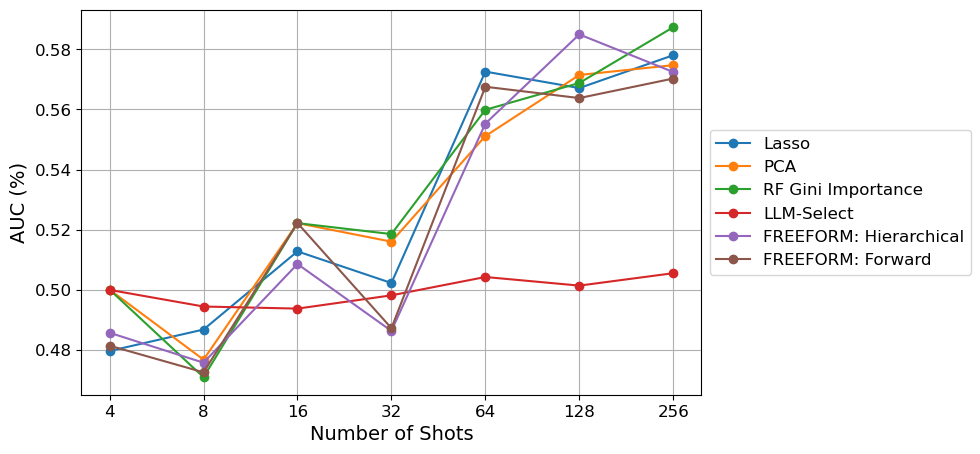

In [39]:
# Assuming you have results from multiple methods
# Assuming you have already computed the results for each method
results_dict_hearing_loss = {
    'Lasso': log_reg_results_lasso_hearing_loss,
    'PCA': log_reg_results_pca_hearing_loss,
    'RF Gini Importance': log_reg_results_gini_rf_hearing_loss,
    #'Forward': log_reg_results_forward_hearing_loss,
    #'Backward': log_reg_results_backward_hearing_loss,
    'LLM-Select': log_reg_results_llm_select_hearing_loss,
    'FREEFORM: Hierarchical': log_reg_results_pyramid_hearing_loss,
    'FREEFORM: Forward': log_reg_results_iterative_soc_hearing_loss,

        # "o1": log_reg_results_o1_hearing_loss,
}


utils_selection.plot_results("hearing loss","lr", results_dict_hearing_loss, shots, save=True)

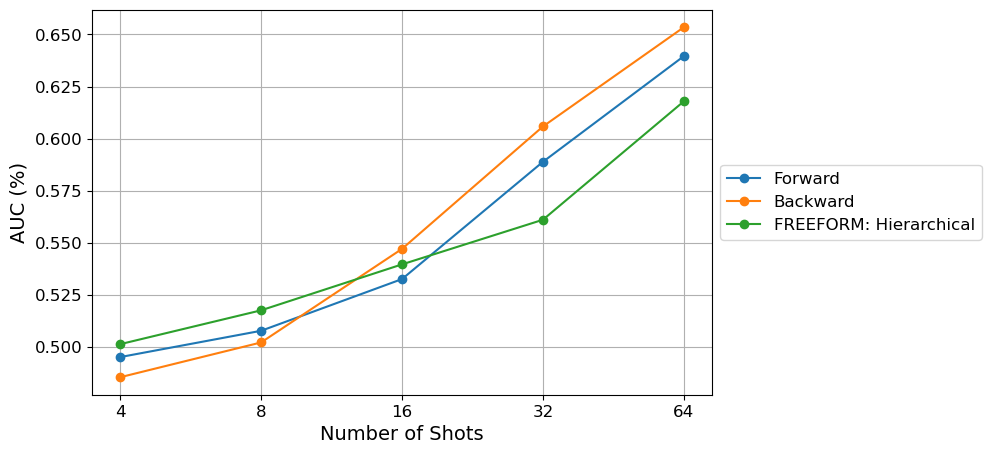

In [144]:
shots = [4,8,16,32,64]
# Assuming you have results from multiple methods
# Assuming you have already computed the results for each method
results_dict_hearing_loss = {
    # 'LASSO': rf_results_lasso_hearing_loss,
    # 'PCA': rf_results_pca_hearing_loss,
    # "RF Gini": rf_results_gini_rf_hearing_loss,
    'Forward': rf_results_forward_hearing_loss,
    'Backward': rf_results_backward_hearing_loss,
    # 'LLM-Select': rf_results_llm_select_hearing_loss,
    'FREEFORM: Hierarchical': rf_results_pyramid_hearing_loss,
    # 'FREEFORM: Forward': rf_results_iterative_soc_hearing_loss,
    # "permutation": rf_results_permutation_rf_hearing_loss,
}

utils_selection.plot_results("hearing loss", "rf",results_dict_hearing_loss, shots, save=True)

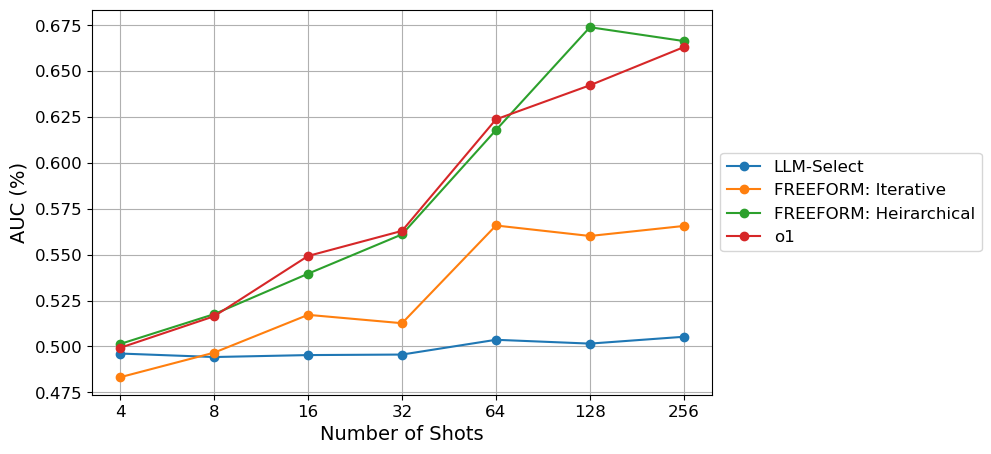

In [63]:
# Assuming you have results from multiple methods
# Assuming you have already computed the results for each method
results_dict_hearing_loss = {
    'LLM-Select': rf_results_llm_select_hearing_loss,
    'FREEFORM: Iterative': rf_results_iterative_soc_hearing_loss,
    'FREEFORM: Heirarchical': rf_results_pyramid_hearing_loss,
    "o1": rf_results_o1_hearing_loss,
}


utils_selection.plot_results("hearing loss", "rf",results_dict_hearing_loss, shots)

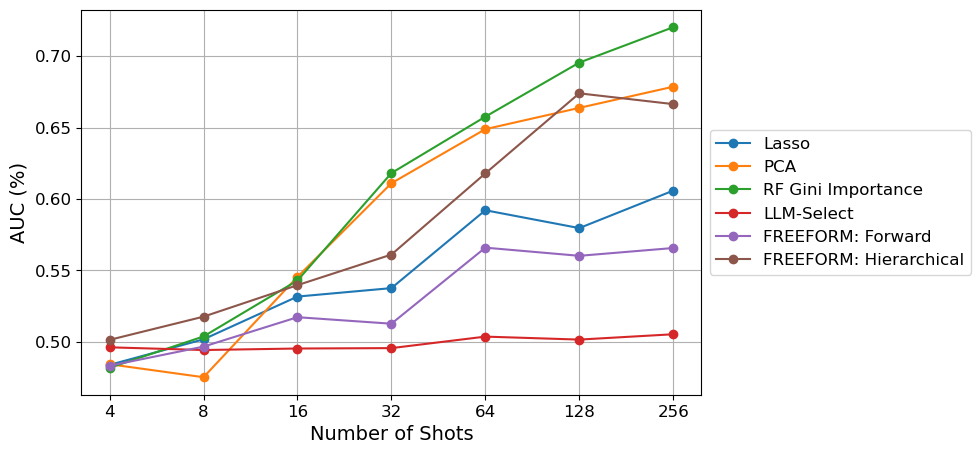

In [40]:
# Assuming you have results from multiple methods
# Assuming you have already computed the results for each method
results_dict_rf_hearing_loss = {
    'Lasso': rf_results_lasso_hearing_loss,
    'PCA': rf_results_pca_hearing_loss,
    "RF Gini Importance": rf_results_gini_rf_hearing_loss,
    #'Forward': rf_results_forward_hearing_loss,
    #'Backward': rf_results_backward_hearing_loss,
    'LLM-Select': rf_results_llm_select_hearing_loss,
    'FREEFORM: Forward': rf_results_iterative_soc_hearing_loss,
    'FREEFORM: Hierarchical': rf_results_pyramid_hearing_loss,
}


utils_selection.plot_results("hearing loss", "rf",results_dict_rf_hearing_loss, shots)

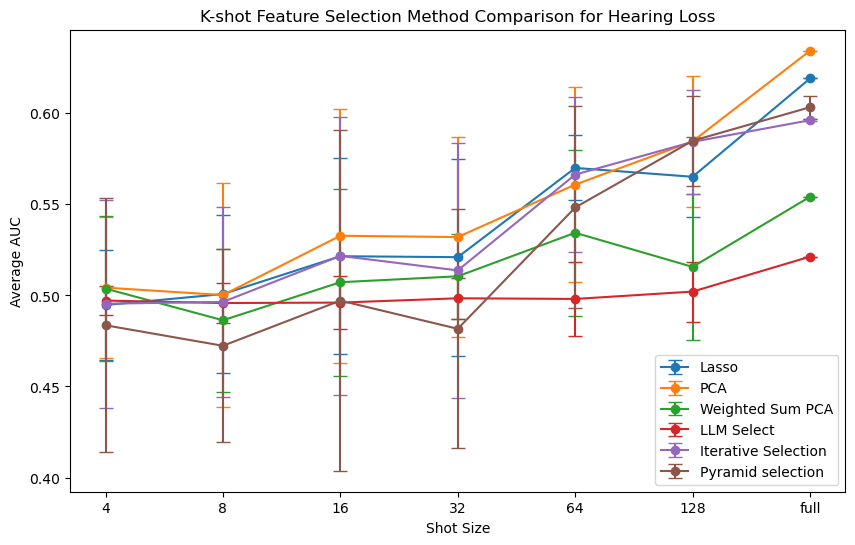

In [147]:
plot_results_with_error_bars("Hearing Loss", results_dict_hearing_loss, shots)

In [149]:
# paired t-test between LLM-select & Pyramid

p_value_log_reg, p_value_rf = compute_p_value_for_auc(
    log_reg_results_pyramid_hearing_loss,
    log_reg_results_llm_select_hearing_loss,
    rf_results_pyramid_hearing_loss,
    rf_results_llm_select_hearing_loss,
    shots
)
print(p_value_log_reg, p_value_rf)

ValueError: unequal length arrays

In [111]:
pd.read_csv('../data/hearing_loss.csv')['y'].count()

1209

## Hearing Loss (new shots)

In [16]:
data_name = 'hearing_loss_modified'


# Lasso-based feature selection and ML evaluation
seeds = [0, 1, 2,3,4]
shots = [4,8,12,16,20,24] 

file = 'hearing_loss_maybe_snps.pkl'
with open(file, 'rb') as file:
    maybe_snps = pickle.load(file)

In [17]:
# PCA
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_pca_hearing_loss, rf_results_pca_hearing_loss, _ = utils_selection.evaluate_feature_selection(data_name, "pca", seeds, shots, return_stored_results=True)
    utils_selection.print_results("pca", "hearing_loss", log_reg_results_pca_hearing_loss, rf_results_pca_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_pca_[4, 8, 12, 16, 20, 24]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pca feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.4344    | 0.10 | 0.5001  | 0.04 |    0.4371    | 0.13 |
|  4   |    Random Forest    |    0.4391    | 0.17 | 0.4843  | 0.03 |    0.3919    | 0.23 |
|  8   | Logistic Regression |    0.4295    | 0.05 | 0.4710  | 0.04 |    0.4562    | 0.06 |
|  8   |    Random Forest    |    0.4404    | 0.09 | 0.5112  | 0.07 |    0.4475    | 0.13 |
|  12  | Logistic Regression | 

In [18]:
# Lasso
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_lasso_hearing_loss, rf_results_lasso_hearing_loss,_ = utils_selection.evaluate_feature_selection(data_name, "lasso", seeds, shots, return_stored_results=True)
    utils_selection.print_results("lasso", "ancestry", log_reg_results_lasso_hearing_loss, rf_results_lasso_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_lasso_[4, 8, 12, 16, 20, 24]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot lasso feature selection on k-shot classification for: ancestry

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.5242    | 0.21 | 0.4797  | 0.04 |    0.4704    | 0.19 |
|  4   |    Random Forest    |    0.3652    | 0.17 | 0.4838  | 0.04 |    0.3000    | 0.19 |
|  8   | Logistic Regression |    0.4424    | 0.14 | 0.4868  | 0.04 |    0.4260    | 0.19 |
|  8   |    Random Forest    |    0.4083    | 0.16 | 0.5017  | 0.06 |    0.3659    | 0.21 |
|  12  | Logistic Regression | 

In [19]:
# gini
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_gini_rf_hearing_loss, rf_results_gini_rf_hearing_loss, a1 = utils_selection.evaluate_feature_selection(data_name, "gini", seeds, shots, model = "rf", return_stored_results=True)
    utils_selection.print_results("pca_weighted_sum", "hearing_loss", log_reg_results_gini_rf_hearing_loss, rf_results_gini_rf_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_gini_[4, 8, 12, 16, 20, 24]_[0, 1, 2, 3, 4]_15_rf.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
Results for k-shot pca_weighted_sum feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.4344    | 0.10 | 0.5001  | 0.04 |    0.4371    | 0.13 |
|  4   |    Random Forest    |    0.4507    | 0.18 | 0.4818  | 0.04 |    0.4006    | 0.23 |
|  8   | Logistic Regression |    0.4295    | 0.05 | 0.4710  | 0.04 |    0.4562    | 0.06 |
|  8   |    Random Forest    |    0.4424    | 0.09 | 0.5037  | 0.06 |    0.4443    | 0.13 |
|  12  | Logis

### script

In [7]:
import pickle
import re
import os

def update_pkl_files(filenames, new_shots):
    """
    Updates the given .pkl files to use the specified shots and saves them with updated filenames.
    Also prints the features for each seed and shot.

    Parameters:
        filenames (list): List of .pkl filenames to process.
        new_shots (list): List of shots to use in the updated files.

    """
    for filename in filenames:
        # Load the original data
        with open(filename, 'rb') as f:
            data = pickle.load(f)
        print(data)
        # Assume data has the structure: {'feature_selections': {seed1: features_dict, seed2: features_dict, ...}}
        feature_selections = data['feature_selections']

        # Generate the new filename by replacing the shots in the original filename
        new_shots_str = str(new_shots).replace(' ', '')
        new_filename = re.sub(r'\[.*?\]', new_shots_str, filename, count=1)

        # Save the updated data to the new file
        with open(new_filename, 'wb') as f:
            pickle.dump(data, f)

        # Print the features for each seed and shot
        print(f"\nFeatures in '{new_filename}':")
        for seed, features_list in feature_selections.items():
            print(f"Seed: {seed}")
            print(f"    Features: {features_list}")
        print("\n" + "-" * 50 + "\n")

# Example usage:
filenames = [
    '../data/selected_features/feature_selection_hearing_loss_modified_iterative_self_consistency_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15.pkl',
    '../data/selected_features/feature_selection_hearing_loss_modified_llm_select_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15.pkl',
    '../data/selected_features/feature_selection_hearing_loss_pyramid_[4, 8, 16, 32, 64, 128, 256]_[0, 1, 2, 3, 4]_15.pkl'
]

new_shots = [4, 8, 12, 16, 20, 24]

update_pkl_files(filenames, new_shots)

{'feature_selections': {0: ['A1555G', 'p.R143Q', 'p.V37I', 'p.R75Q', 'p.R409H', 'p.R776H', 'p.R75W', 'p.L676Q', 'p.N392Y', 'G1442A', 'p.D87Y', 'p.F191L', 'p.M147V', 'p.G91X', 'c.35delG'], 1: ['A1555G', 'p.R143Q', 'p.R409H', 'p.V37I', 'p.R75W', 'p.R143W', 'p.L36P', 'p.R75Q', 'c.35delG', 'c.36insG', 'c.35insG', 'G1442A', 'p.A429E', 'c.1452T>C', 'c.1438G>A'], 2: ['A1555G', 'p.V37I', 'p.R143Q', 'p.R75Q', 'p.R409H', 'p.R776H', 'p.R143W', 'p.V167M', 'p.N392Y', 'p.A429E', 'p.R75W', 'c.35delG', 'p.G91X', 'p.M147V', 'p.L36P'], 3: ['A1555G', 'p.V37I', 'p.R143Q', 'p.R75W', 'p.R409H', 'p.R776H', 'p.L703V', 'p.R143W', 'G1442A', 'p.R75Q', 'p.N392Y', 'c.35delG', 'c.1452T>C', 'c.35insG', 'p.L36P'], 4: ['A1555G', 'p.R143Q', 'p.V37I', 'p.R75Q', 'p.N392Y', 'p.R776H', 'p.R143W', 'p.R75W', 'c.35delG', 'p.G91X', 'p.Q589R', 'c.35insG', 'G1442A', 'c.1179_1181delTCT', 'p.R409H']}, 'params': {'seeds': [0, 1, 2, 3, 4], 'shots': [4, 8, 16, 32, 64, 128, 256], 'top_k': 15, 'data_name': 'hearing_loss_modified', 'sel

### continue

In [28]:
# Iterative SoC
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_iterative_soc_hearing_loss, rf_results_iterative_soc_hearing_loss, a = utils_selection.evaluate_feature_selection(data_name, "iterative_self_consistency", seeds, shots, feature_selection_pool=maybe_snps,return_stored_results=False)
    utils_selection.print_results("iterative_self_consistency", "hearing_loss", log_reg_results_iterative_soc_hearing_loss, rf_results_iterative_soc_hearing_loss, shots)


../data/selected_features/feature_selection_hearing_loss_modified_iterative_self_consistency_[4, 8, 12, 16, 20, 24]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
New seeds to process: []
------------- Doing ML Analysis for 4-shots -------------
Re-doing complete ML downstream analysis...
Seed: 0
Evaluating log_reg for seed 0...
Evaluating rf for seed 0...
Seed: 1
Evaluating log_reg for seed 1...
Evaluating rf for seed 1...
Seed: 2
Evaluating log_reg for seed 2...
Evaluating rf for seed 2...
Seed: 3
Evaluating log_reg for seed 3...
Evaluating rf for seed 3...
Seed: 4
Evaluating log_reg for seed 4...
Evaluating rf for seed 4...
------------- Doing ML Analysis for 8-shots -------------
Re-doing complete ML downstream analysis...
Seed: 0
Evaluating log_reg for seed 0...
Evaluating rf for seed 0...
Seed: 1
Evaluating log_reg for seed 1...
Evaluating rf for seed 1...
Seed: 2
Evaluating log_re

In [29]:
# LLM-select
log_reg_results_llm_select_hearing_loss, rf_results_llm_select_hearing_loss, a = utils_selection.evaluate_feature_selection(data_name, "llm_select", seeds, shots, feature_selection_pool=maybe_snps,return_stored_results=False)
utils_selection.print_results("llm_select", "hearing_loss", log_reg_results_llm_select_hearing_loss, rf_results_llm_select_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_modified_llm_select_[4, 8, 12, 16, 20, 24]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
New seeds to process: []
------------- Doing ML Analysis for 4-shots -------------
Re-doing complete ML downstream analysis...
Seed: 0
Evaluating log_reg for seed 0...
Evaluating rf for seed 0...
Seed: 1
Evaluating log_reg for seed 1...
Evaluating rf for seed 1...
Seed: 2
Evaluating log_reg for seed 2...
Evaluating rf for seed 2...
Seed: 3
Evaluating log_reg for seed 3...
Evaluating rf for seed 3...
Seed: 4
Evaluating log_reg for seed 4...
Evaluating rf for seed 4...
------------- Doing ML Analysis for 8-shots -------------
Re-doing complete ML downstream analysis...
Seed: 0
Evaluating log_reg for seed 0...
Evaluating rf for seed 0...
Seed: 1
Evaluating log_reg for seed 1...
Evaluating rf for seed 1...
Seed: 2
Evaluating log_reg for seed 2...


/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/envs/clinfo2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Results for k-shot llm_select feature selection on k-shot classification for: hearing_loss

+------+---------------------+--------------+------+---------+------+--------------+------+
| SHOT |        Model        | Avg Accuracy | Std  | Avg AUC | Std  | Avg F1 Score | Std  |
+------+---------------------+--------------+------+---------+------+--------------+------+
|  4   | Logistic Regression |    0.4487    | 0.25 | 0.5000  | 0.00 |    0.3185    | 0.27 |
|  4   |    Random Forest    |    0.4457    | 0.24 | 0.4961  | 0.01 |    0.3353    | 0.26 |
|  8   | Logistic Regression |    0.4632    | 0.24 | 0.4945  | 0.01 |    0.3582    | 0.25 |
|  8   |    Random Forest    |    0.3593    | 0.20 | 0.4942  | 0.01 |    0.2464    | 0.21 |
|  12  | Logistic Regression |    0.6434    | 0.18 | 0.4881  | 0.01 |    0.5566    | 0.18 |
|  12  |    Random Forest    |    0.6272    | 0.19 | 0.4892  | 0.01 |    0.5392    | 0.22 |
|  16  | Logistic Regression |    0.5579    | 0.23 | 0.4938  | 0.02 |    0.4676 

In [30]:
# Old Pyramid 
reload(utils_selection)
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=ConvergenceWarning)
    log_reg_results_pyramid_hearing_loss, rf_results_pyramid_hearing_loss, a = utils_selection.evaluate_feature_selection("hearing_loss", "pyramid", seeds, shots, feature_selection_pool=maybe_snps,return_stored_results=False)
    utils_selection.print_results("pyramid", "hearing_loss", log_reg_results_pyramid_hearing_loss, rf_results_pyramid_hearing_loss, shots)

../data/selected_features/feature_selection_hearing_loss_pyramid_[4, 8, 12, 16, 20, 24]_[0, 1, 2, 3, 4]_15.pkl
Loading full results...
Results and feature selections have already been calculated and saved.... loading selected features
New seeds to process: []
------------- Doing ML Analysis for 4-shots -------------
Re-doing complete ML downstream analysis...
Seed: 0
Evaluating log_reg for seed 0...
Evaluating rf for seed 0...
Seed: 1
Evaluating log_reg for seed 1...
Evaluating rf for seed 1...
Seed: 2
Evaluating log_reg for seed 2...
Evaluating rf for seed 2...
Seed: 3
Evaluating log_reg for seed 3...
Evaluating rf for seed 3...
Seed: 4
Evaluating log_reg for seed 4...
Evaluating rf for seed 4...
------------- Doing ML Analysis for 8-shots -------------
Re-doing complete ML downstream analysis...
Seed: 0
Evaluating log_reg for seed 0...
Evaluating rf for seed 0...
Seed: 1
Evaluating log_reg for seed 1...
Evaluating rf for seed 1...
Seed: 2
Evaluating log_reg for seed 2...
Evaluating r

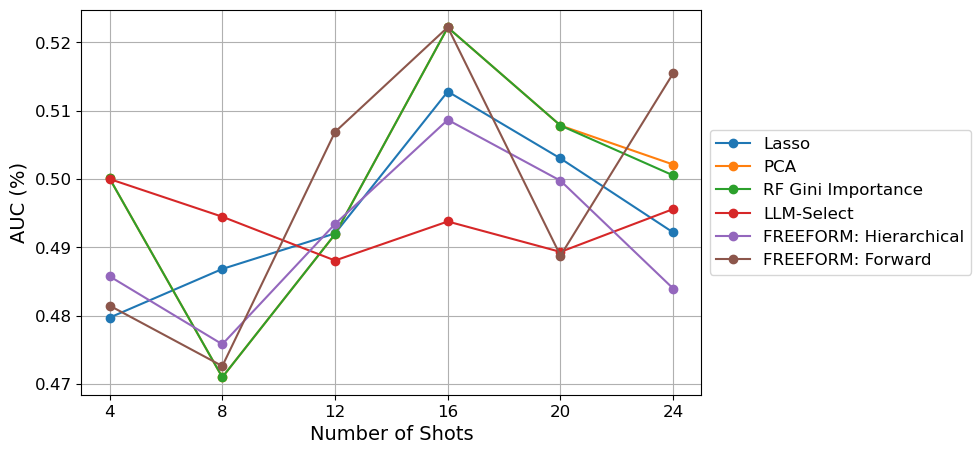

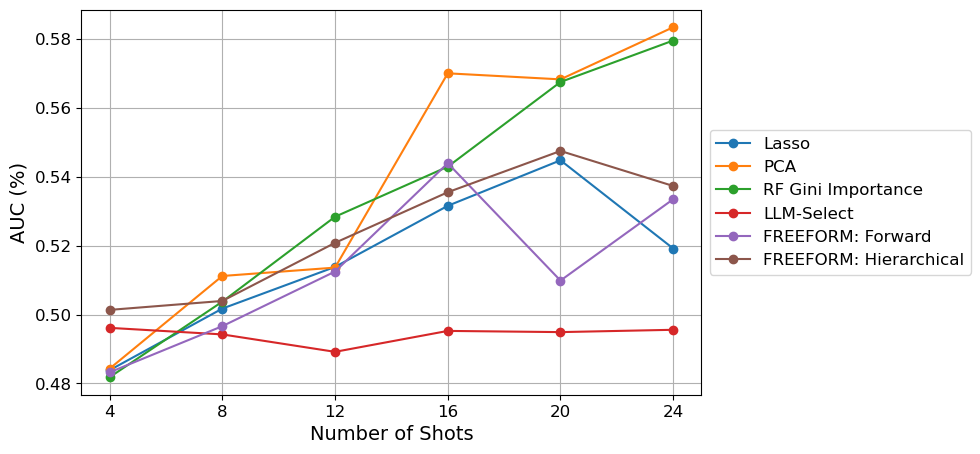

In [31]:
# Assuming you have results from multiple methods
# Assuming you have already computed the results for each method
results_dict_rf_hearing_loss = {
    'Lasso': rf_results_lasso_hearing_loss,
    'PCA': rf_results_pca_hearing_loss,
    "RF Gini Importance": rf_results_gini_rf_hearing_loss,
    'LLM-Select': rf_results_llm_select_hearing_loss,
    'FREEFORM: Forward': rf_results_iterative_soc_hearing_loss,
    'FREEFORM: Hierarchical': rf_results_pyramid_hearing_loss,
}

# Assuming you have results from multiple methods
# Assuming you have already computed the results for each method
results_dict_hearing_loss = {
    'Lasso': log_reg_results_lasso_hearing_loss,
    'PCA': log_reg_results_pca_hearing_loss,
    'RF Gini Importance': log_reg_results_gini_rf_hearing_loss,
    'LLM-Select': log_reg_results_llm_select_hearing_loss,
    'FREEFORM: Hierarchical': log_reg_results_pyramid_hearing_loss,
    'FREEFORM: Forward': log_reg_results_iterative_soc_hearing_loss,

        # "o1": log_reg_results_o1_hearing_loss,
}


utils_selection.plot_results("hearing loss","lr", results_dict_hearing_loss, shots)
utils_selection.plot_results("hearing loss", "rf",results_dict_rf_hearing_loss, shots)

## Analysis

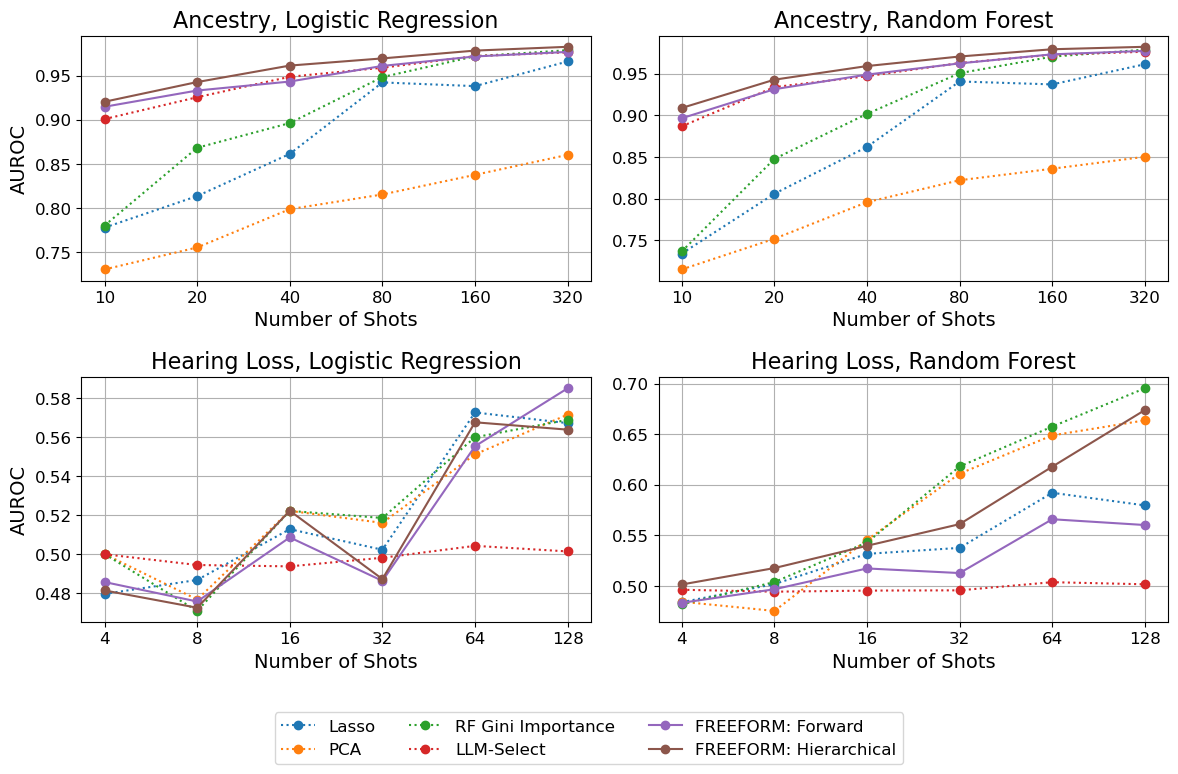

In [53]:
reload(utils_selection)
h_shots = [4,8,16,32,64,128] 
a_shots = [10,20,40,80,160,320] 
shotss = [a_shots,a_shots,h_shots,h_shots]
utils_selection.plot_results_multiple("Ancestry_hearing_loss","rf_lr",
                                      [results_dict, 
                                       results_dict_rf,
                                       results_dict_hearing_loss,
                                       results_dict_rf_hearing_loss], 
                                      shotss,
                                      titles_list=["Ancestry, Logistic Regression", "Ancestry, Random Forest","Hearing Loss, Logistic Regression", "Hearing Loss, Random Forest"], save=True)